## Importing Libraries

In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import shap
import dataframe_image as dfi
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.base import BaseEstimator, ClassifierMixin
import pickle
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import RocCurveDisplay,accuracy_score, f1_score, recall_score,\
                            precision_score, make_scorer,\
                            classification_report,confusion_matrix,\
                            ConfusionMatrixDisplay, average_precision_score,\
                            roc_curve, roc_auc_score, auc
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
df = pd.read_csv("bank.csv")
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.shape

(11162, 17)

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
# check for missing values and display the count of null values for each column
df.isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
deposit                 0

There are no missing values in this dataset

In [7]:
df.describe().T

count         mean          std     min    25%    50%      75%  \
age       11162.0    41.231948    11.913369    18.0   32.0   39.0    49.00   
balance   11162.0  1528.538524  3225.413326 -6847.0  122.0  550.0  1708.00   
day       11162.0    15.658036     8.420740     1.0    8.0   15.0    22.00   
duration  11162.0   371.993818   347.128386     2.0  138.0  255.0   496.00   
campaign  11162.0     2.508421     2.722077     1.0    1.0    2.0     3.00   
pdays     11162.0    51.330407   108.758282    -1.0   -1.0   -1.0    20.75   
previous  11162.0     0.832557     2.292007     0.0    0.0    0.0     1.00   

              max  
age          95.0  
balance   81204.0  
day          31.0  
duration   3881.0  
campaign     63.0  
pdays       854.0  
previous     58.0

## Explaratory Data Analysis (EDA)

In [8]:
class EDA:
    
    def row(self,data):
        fig = make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
        fig.show()
    
    def border_msg(self,msg, indent=1, width=None, title=None):
        """Print message-box with optional title."""
        lines = msg.split('\n')
        space = " " * indent
        if not width:
            width = max(map(len, lines))
        box = f'╔{"═" * (width + indent * 2)}╗\n'  
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'  
            box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  
        box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
        box += f'╚{"═" * (width + indent * 2)}╝' 
        print('\033[92m'+'\033[1m')
        print(box)
        
    def distribution(self,x,title):
        plt.figure(figsize=(10,8))
        ax = sns.distplot(x, kde=False,bins=30)
        values = np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(), values.max())
        colors = plt.cm.jet(norm(values))
        for rec, col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title, size=20, color='black')
        
    def run(self,df):
        
        self.row(df)
        if len(df)>0:
            
            object_df = df.select_dtypes('object').columns.tolist()
            int_df = df.select_dtypes('int').columns.tolist()
            bool_df = df.select_dtypes('bool').columns.tolist()
            float_df = df.select_dtypes('float').columns.tolist()

            if len(object_df)>0:
                
                print( '\033[1m'+"OBJECT TYPE")
                for col in object_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('There are {} unique values in {} column'.format(df[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(int_df)>0:
                
                print('\033[1m'+"INT TYPE")
                for col in int_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('Average value is : {}'.format(df[col].mean()))
                    self.border_msg('Minumum value is : {}'.format(df[col].min()))
                    self.border_msg('Maximum value is : {}'.format(df[col].max()))
                    self.distribution(df[col],title=col)
                    if df[col].mean()>df[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))
                        
                    elif df[col].mean()<df[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")
                        
                    fig = make_subplots(rows=1, cols=2)
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].mean(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "📌 Mean<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].std(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🖇 Standart dev<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
                    fig.show()
                    plt.show()
                 

            if len(bool_df)>0:
                
                print('\033[1m'+"BOOL TYPE")
                for col in bool_df:
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(float_df)>0:
                
                print('\033[1m'+"FLOAT TYPE")
                for col in float_df:
                    for col in int_df:
                        self.distribution(df[col],title=col)
                        if df[col].mean()>df[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))
                        
                        elif df[col].mean()<df[col].std():
                            print(self.border_msg("Normal distributed Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals Std Dev - Distribution is normal")

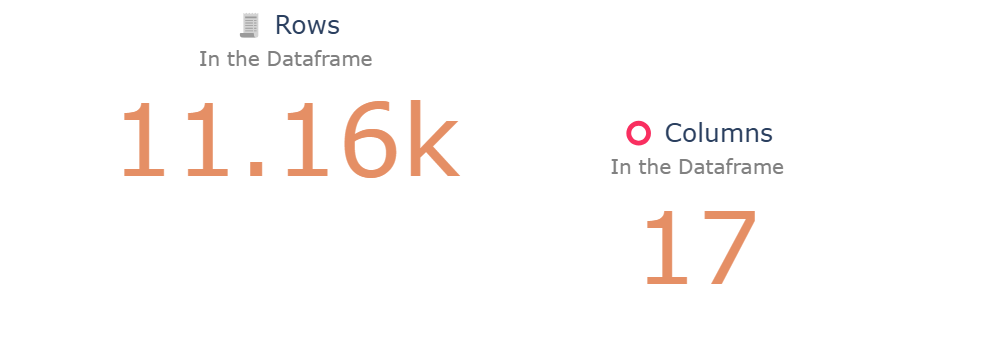

OBJECT TYPE

╔═══════════════════════════════════════════════════════╗
║                          JOB                          ║
╚═══════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 12 unique values in JOB column ║
╚══════════════════════════════════════════╝


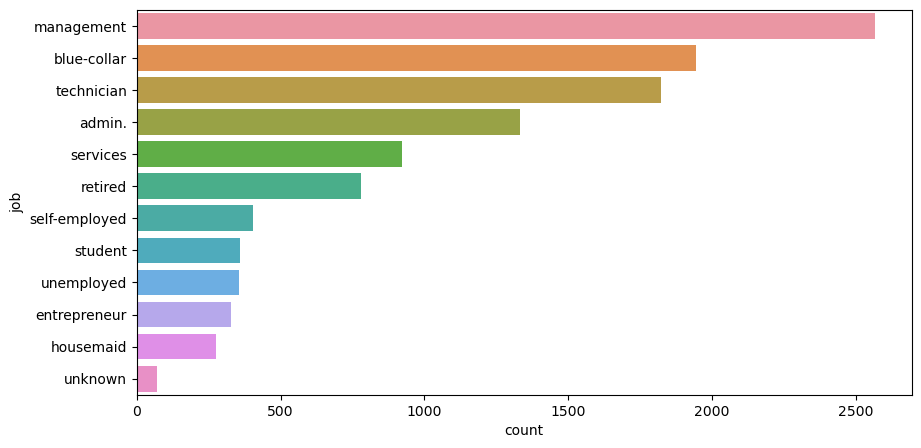


╔═══════════════════════════════════════════════════════════╗
║                          MARITAL                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in MARITAL column ║
╚═════════════════════════════════════════════╝


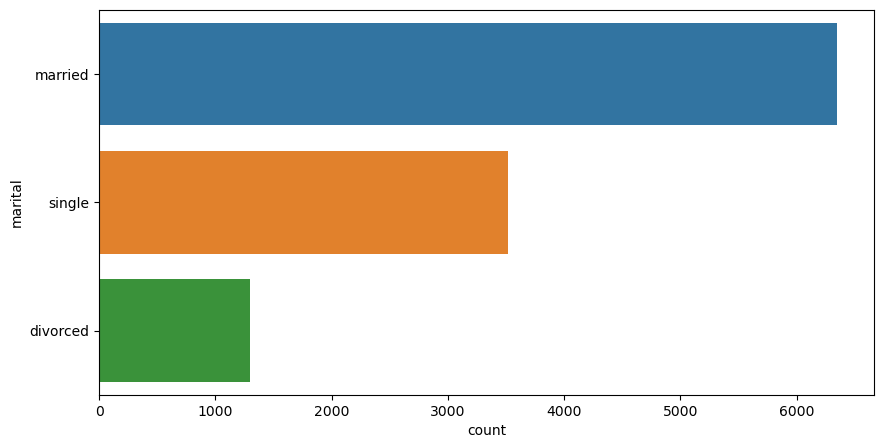


╔═════════════════════════════════════════════════════════════╗
║                          EDUCATION                          ║
╚═════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════════════╗
║ There are 4 unique values in EDUCATION column ║
╚═══════════════════════════════════════════════╝


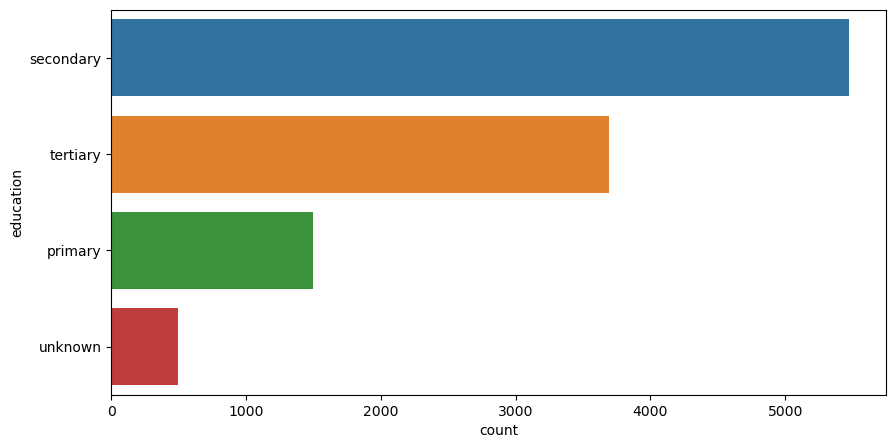


╔═══════════════════════════════════════════════════════════╗
║                          DEFAULT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEFAULT column ║
╚═════════════════════════════════════════════╝


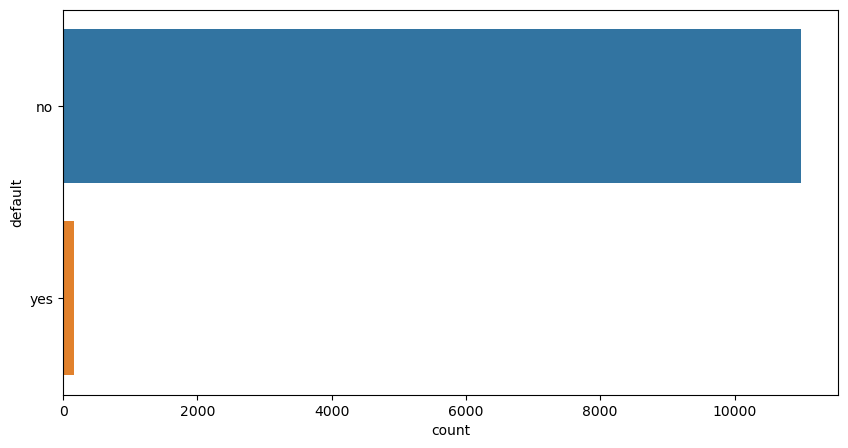


╔═══════════════════════════════════════════════════════════╗
║                          HOUSING                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in HOUSING column ║
╚═════════════════════════════════════════════╝


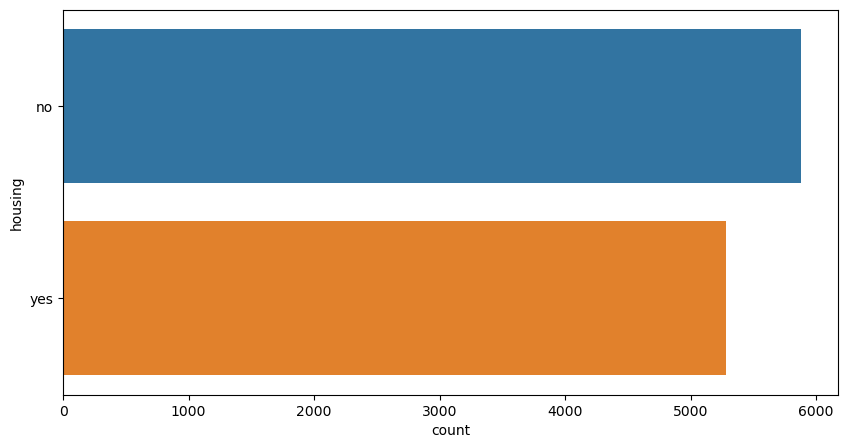


╔════════════════════════════════════════════════════════╗
║                          LOAN                          ║
╚════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════╗
║ There are 2 unique values in LOAN column ║
╚══════════════════════════════════════════╝


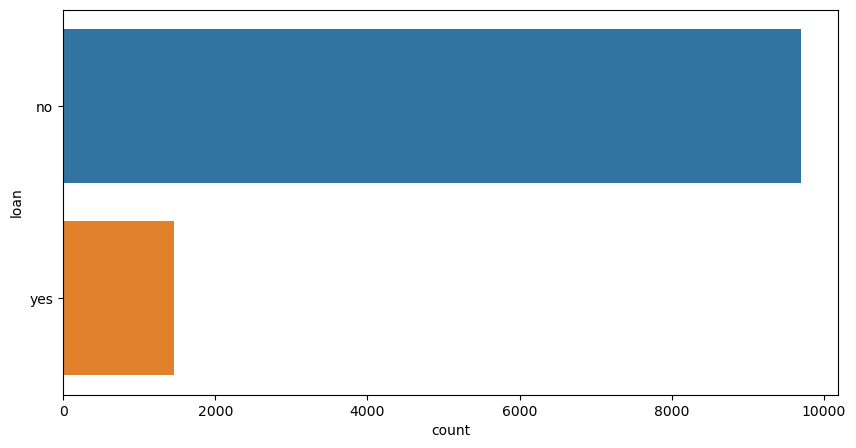


╔═══════════════════════════════════════════════════════════╗
║                          CONTACT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 3 unique values in CONTACT column ║
╚═════════════════════════════════════════════╝


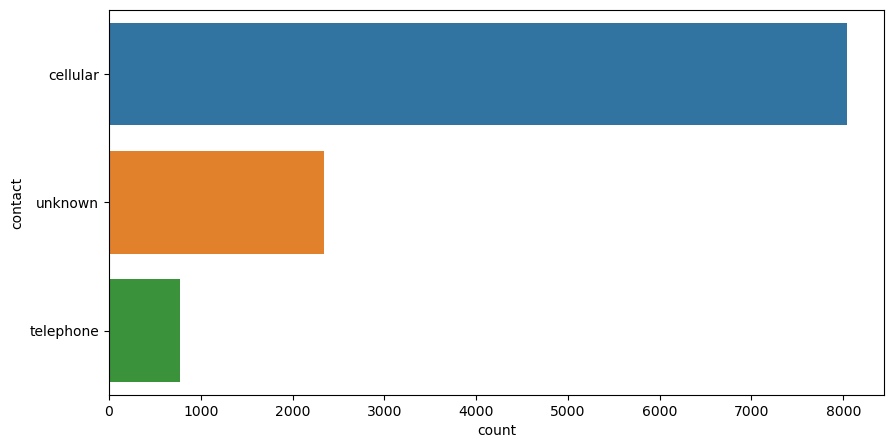


╔═════════════════════════════════════════════════════════╗
║                          MONTH                          ║
╚═════════════════════════════════════════════════════════╝

╔════════════════════════════════════════════╗
║ There are 12 unique values in MONTH column ║
╚════════════════════════════════════════════╝


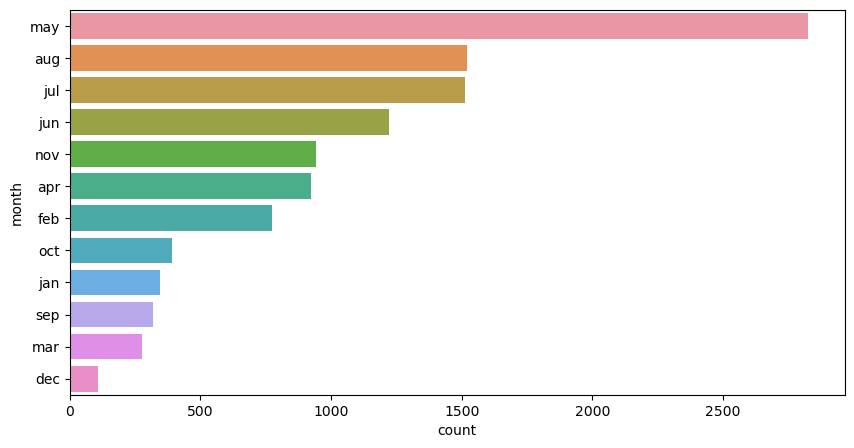


╔════════════════════════════════════════════════════════════╗
║                          POUTCOME                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════════════╗
║ There are 4 unique values in POUTCOME column ║
╚══════════════════════════════════════════════╝


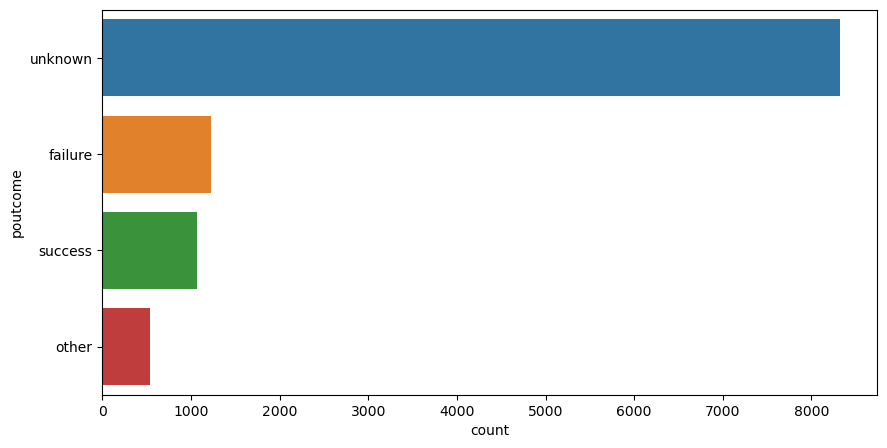


╔═══════════════════════════════════════════════════════════╗
║                          DEPOSIT                          ║
╚═══════════════════════════════════════════════════════════╝

╔═════════════════════════════════════════════╗
║ There are 2 unique values in DEPOSIT column ║
╚═════════════════════════════════════════════╝


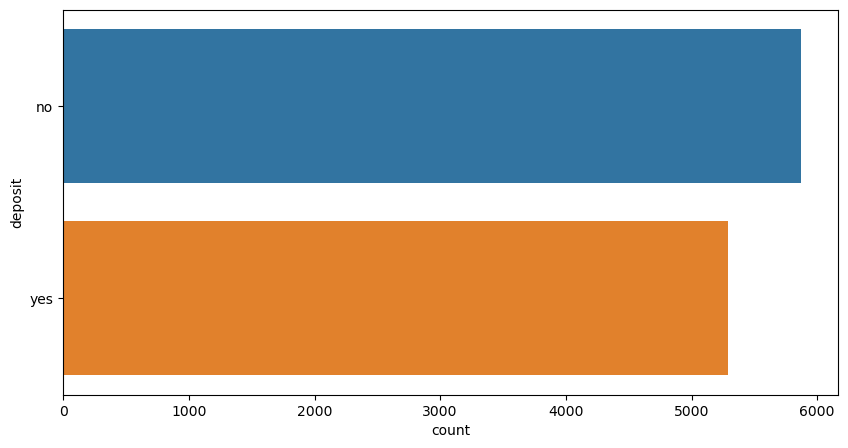

INT TYPE

╔═══════════════════════════════════════════════════════╗
║                          AGE                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 41.231947679627304 ║
╚═══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : 18 ║
╚═══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 95 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


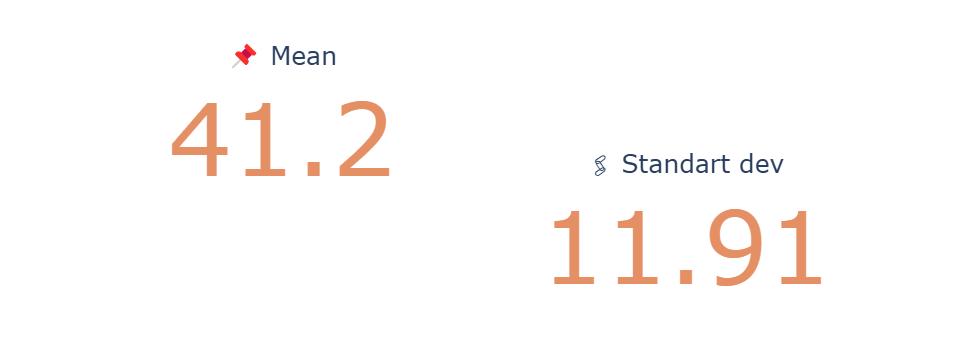

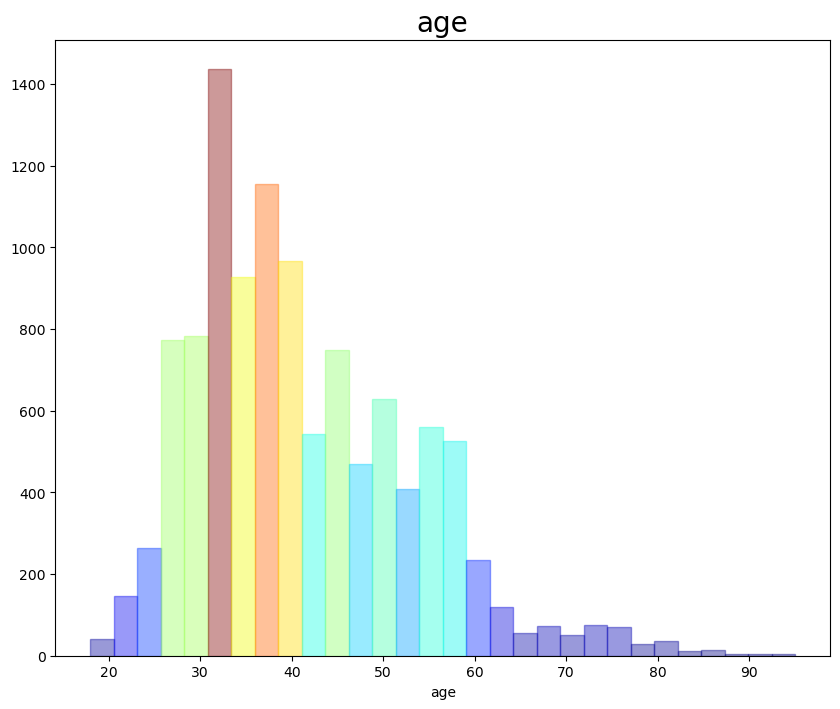


╔═══════════════════════════════════════════════════════════╗
║                          BALANCE                          ║
╚═══════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 1528.5385235620856 ║
╚═══════════════════════════════════════╝

╔══════════════════════════╗
║ Minumum value is : -6847 ║
╚══════════════════════════╝

╔══════════════════════════╗
║ Maximum value is : 81204 ║
╚══════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


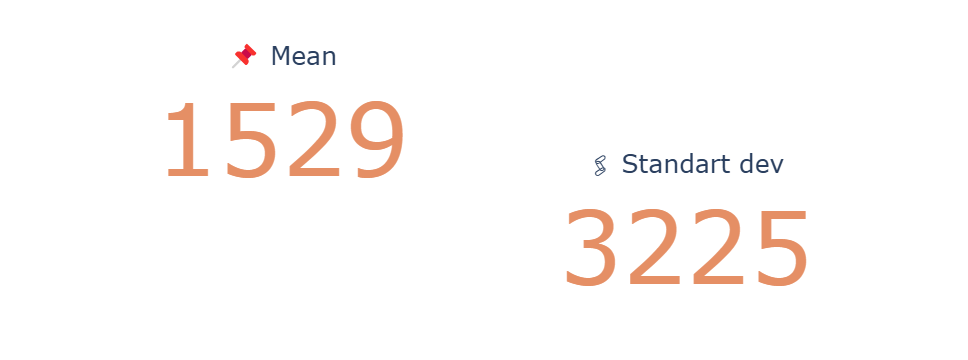

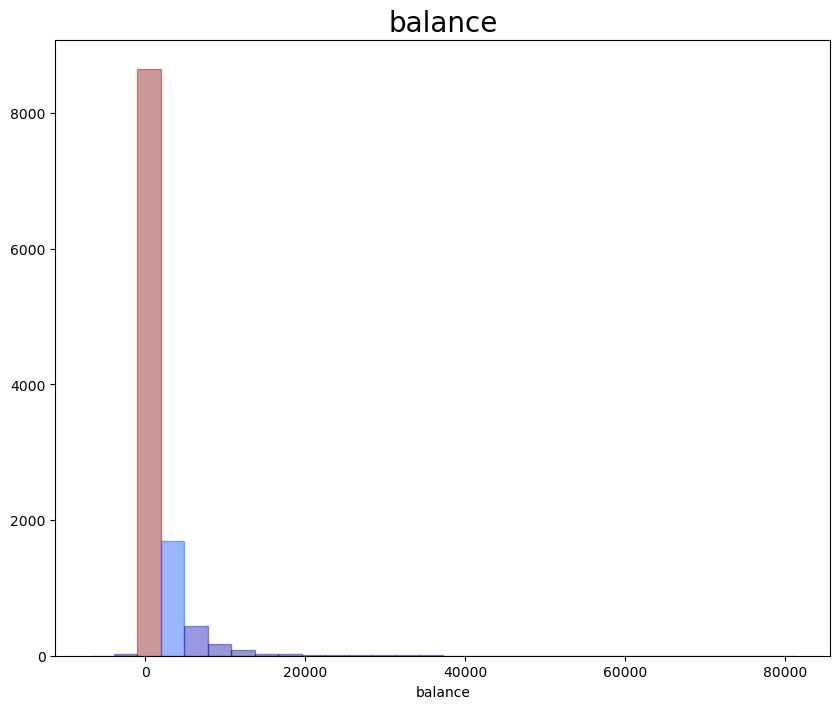


╔═══════════════════════════════════════════════════════╗
║                          DAY                          ║
╚═══════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 15.658036194230425 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 31 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


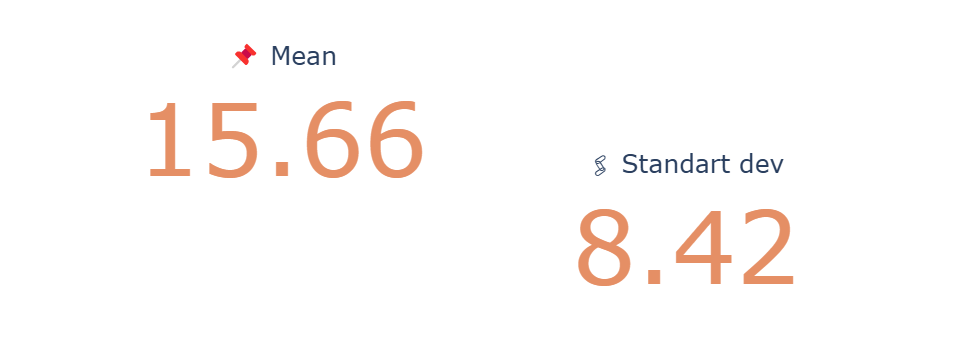

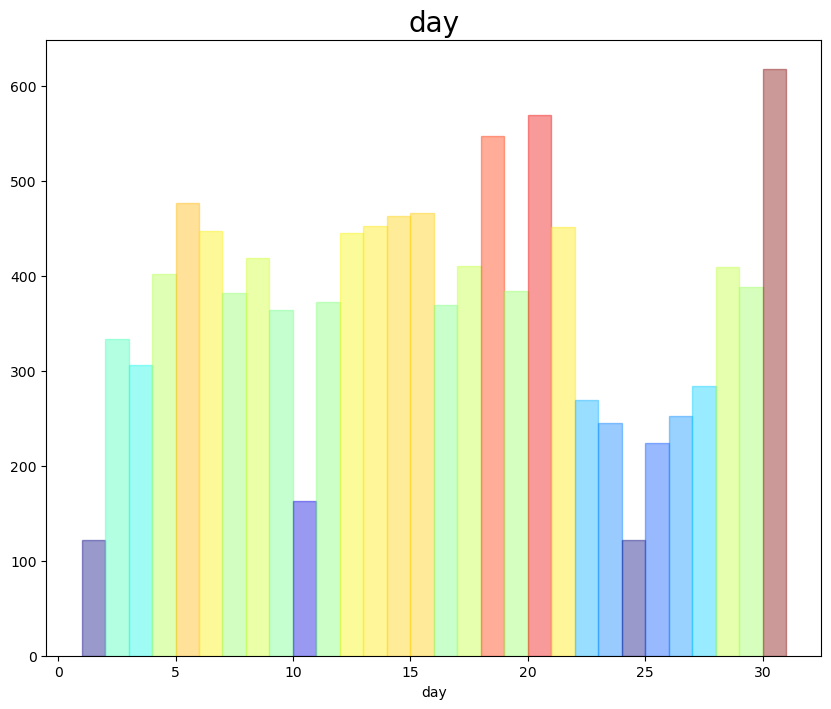


╔════════════════════════════════════════════════════════════╗
║                          DURATION                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 371.99381831213043 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 2 ║
╚══════════════════════╝

╔═════════════════════════╗
║ Maximum value is : 3881 ║
╚═════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located below mean ║
╚════════════════════════════════════════════╝
None


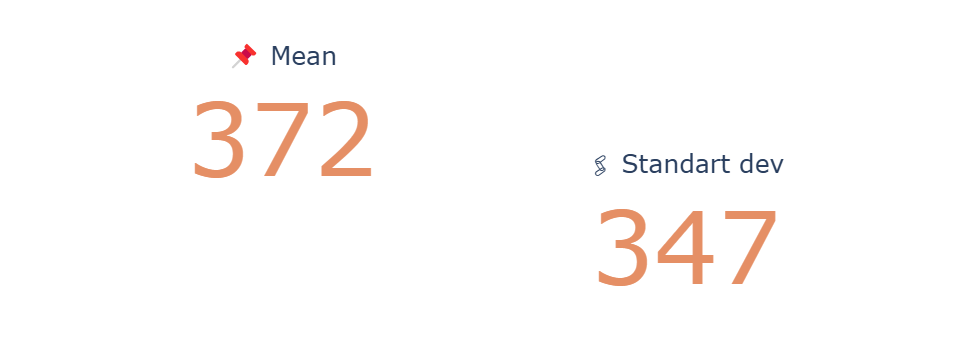

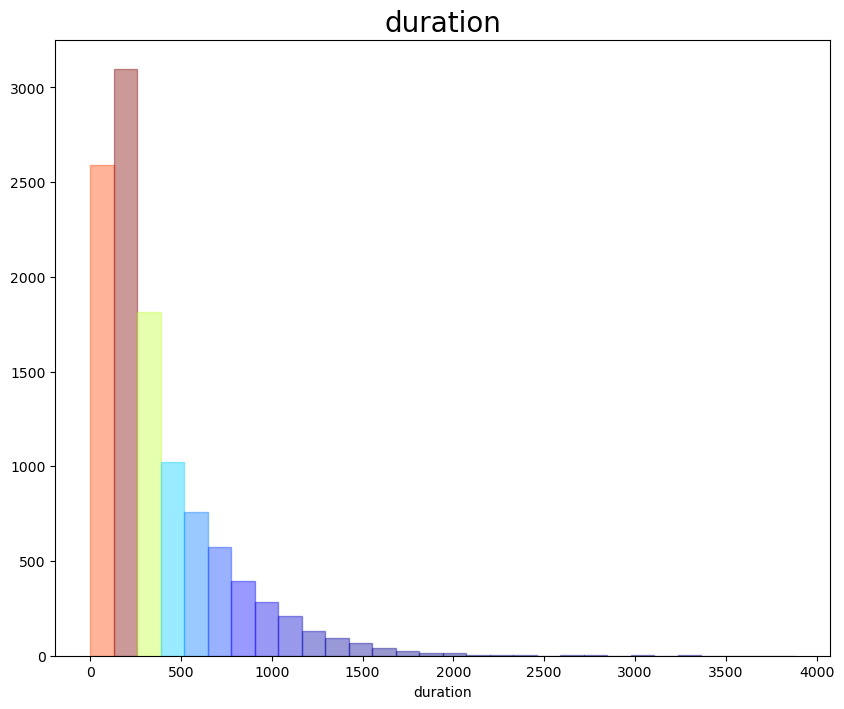


╔════════════════════════════════════════════════════════════╗
║                          CAMPAIGN                          ║
╚════════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 2.508421429851281 ║
╚══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 1 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 63 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


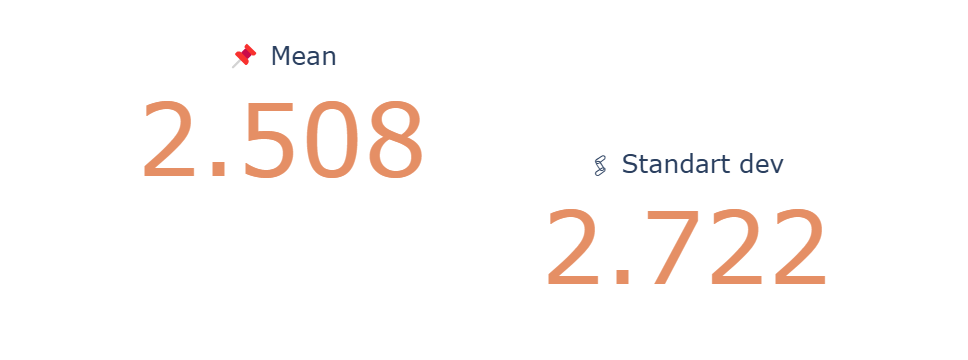

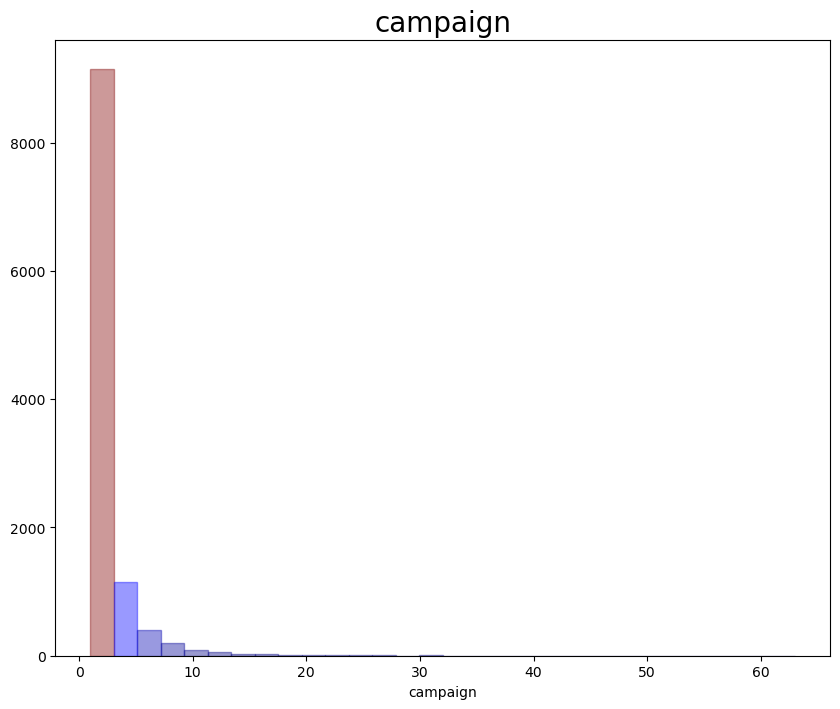


╔═════════════════════════════════════════════════════════╗
║                          PDAYS                          ║
╚═════════════════════════════════════════════════════════╝

╔══════════════════════════════════════╗
║ Average value is : 51.33040673714388 ║
╚══════════════════════════════════════╝

╔═══════════════════════╗
║ Minumum value is : -1 ║
╚═══════════════════════╝

╔════════════════════════╗
║ Maximum value is : 854 ║
╚════════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


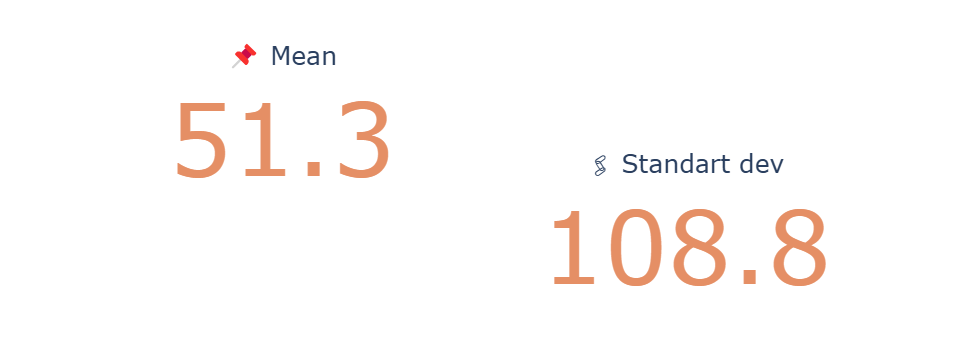

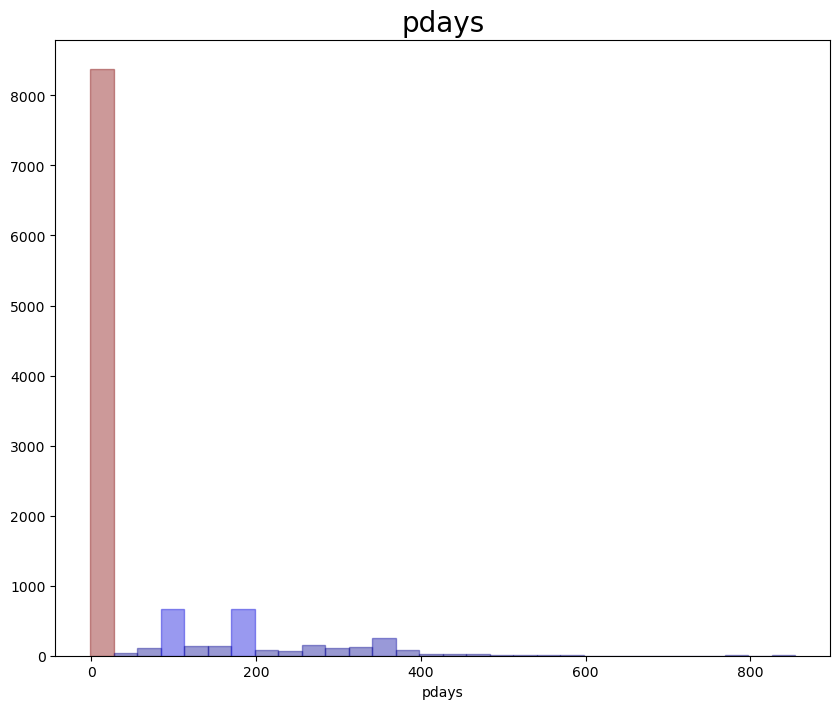


╔════════════════════════════════════════════════════════════╗
║                          PREVIOUS                          ║
╚════════════════════════════════════════════════════════════╝

╔═══════════════════════════════════════╗
║ Average value is : 0.8325568894463358 ║
╚═══════════════════════════════════════╝

╔══════════════════════╗
║ Minumum value is : 0 ║
╚══════════════════════╝

╔═══════════════════════╗
║ Maximum value is : 58 ║
╚═══════════════════════╝

╔════════════════════════════════════════════╗
║ Normal distributed Data Located above mean ║
╚════════════════════════════════════════════╝
None


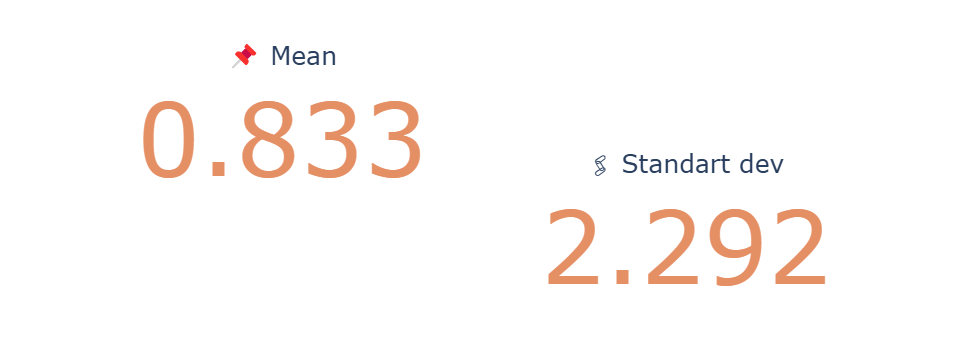

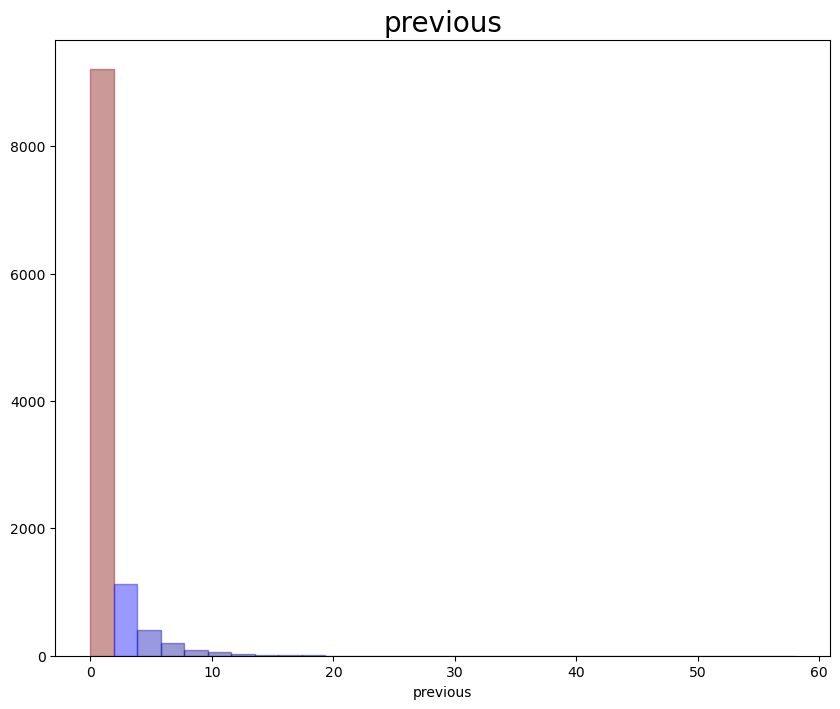

In [9]:
EDA().run(df)

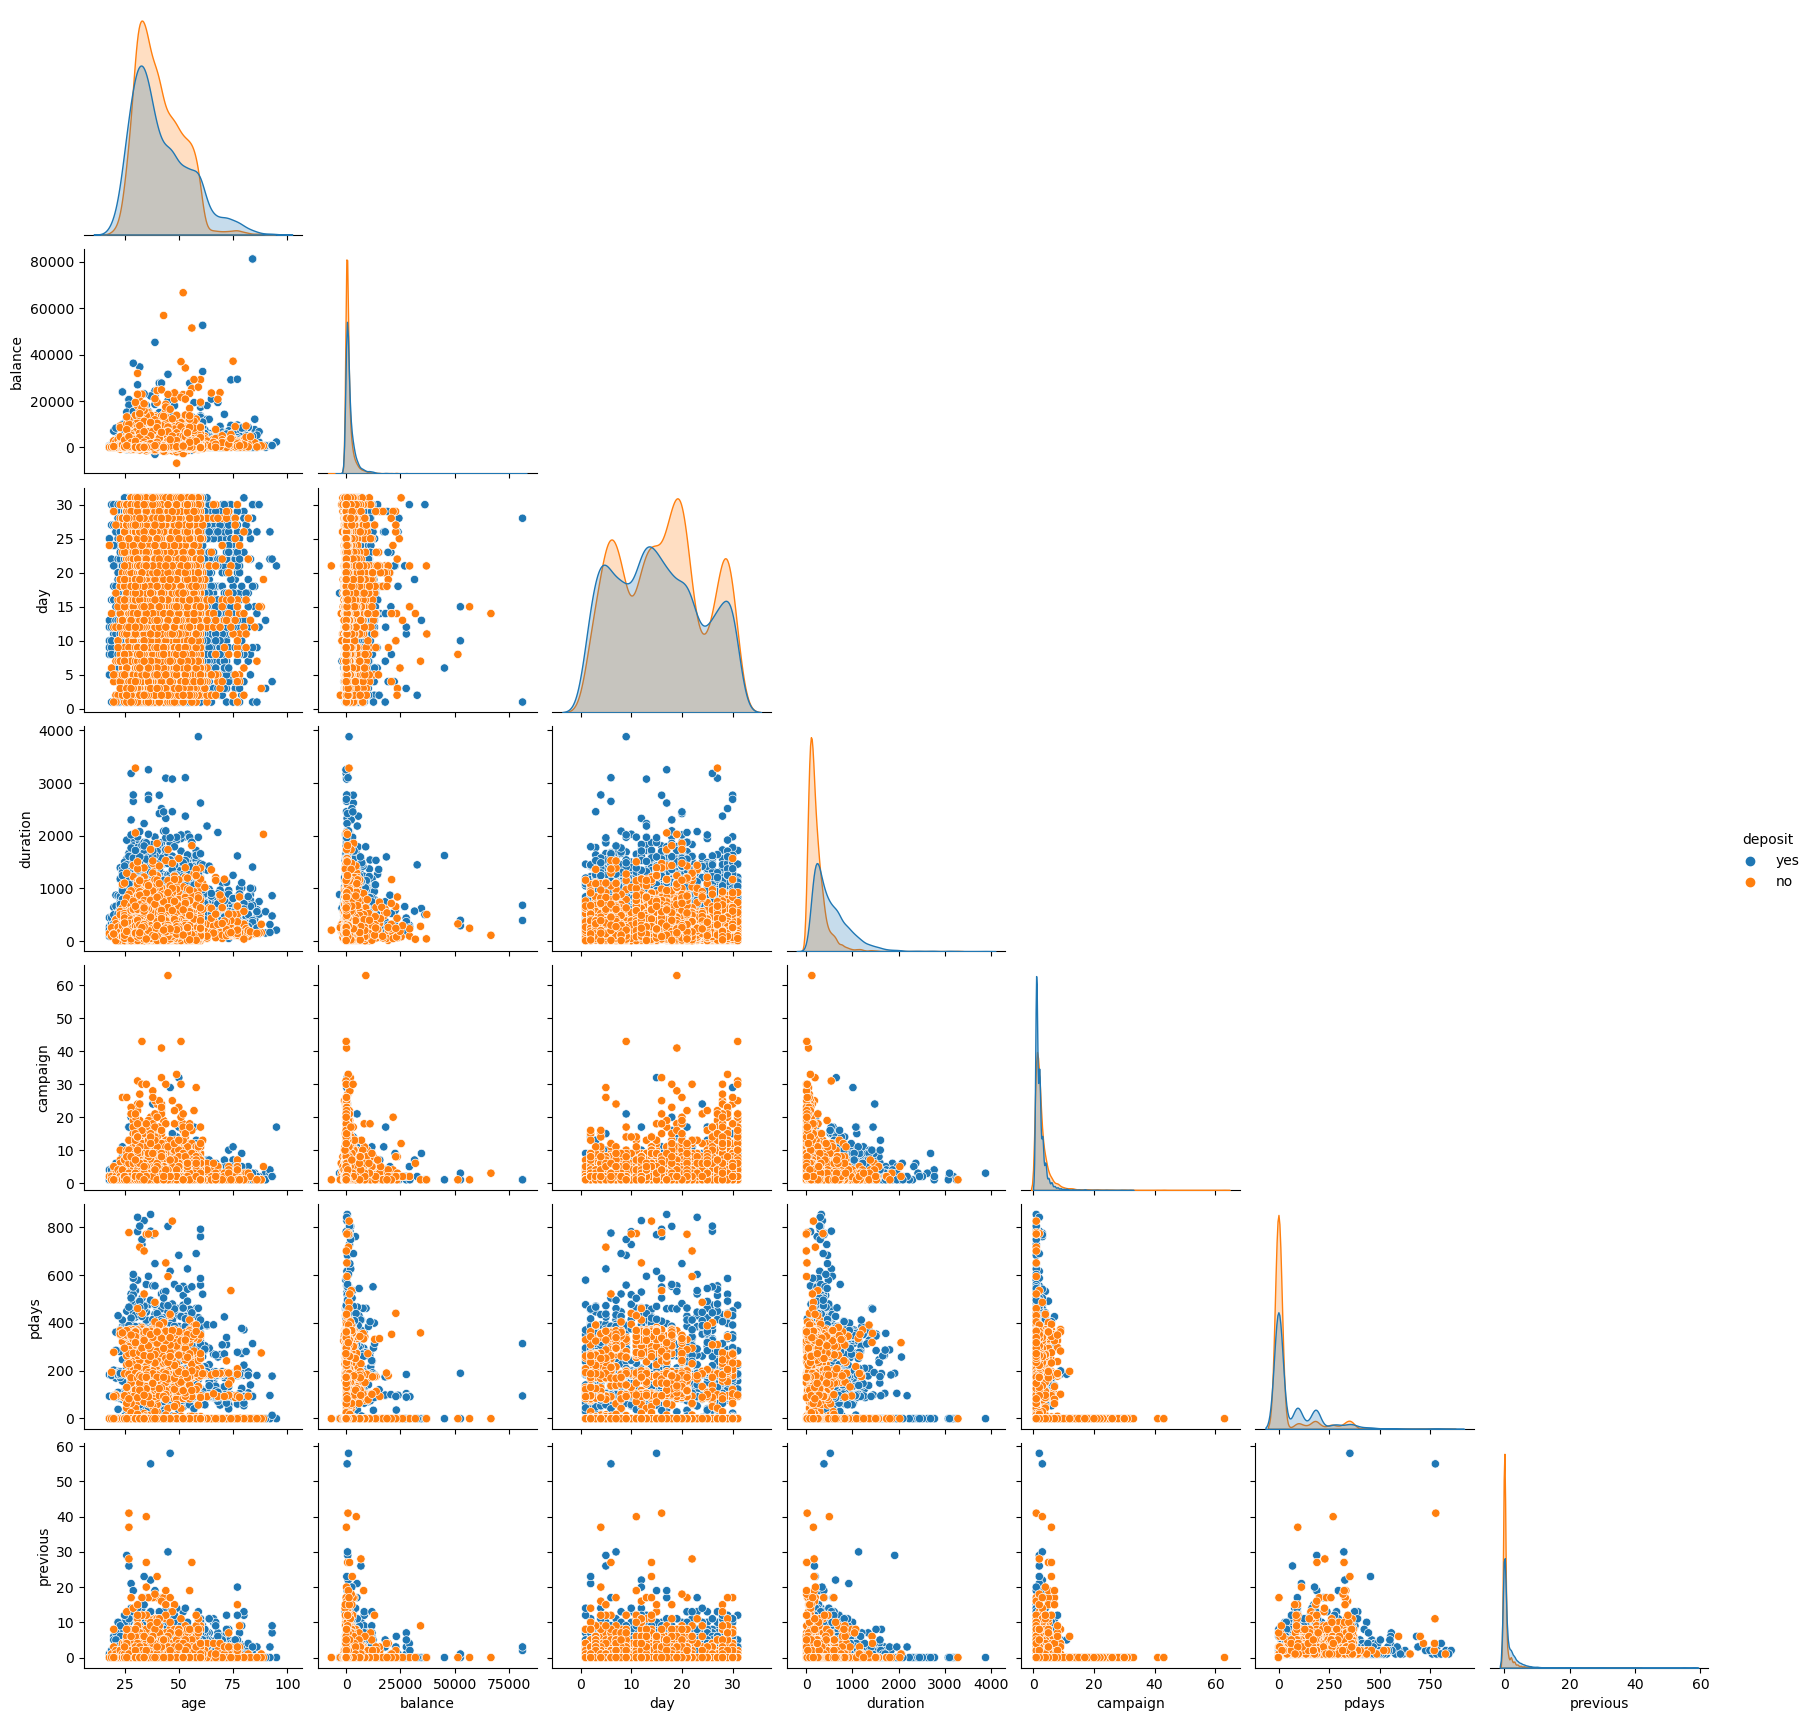

In [10]:
pairplot = sns.pairplot(df,hue='deposit',corner=True)
# Save the pairplot as a PNG file
pairplot.savefig("pairplot_output.png")

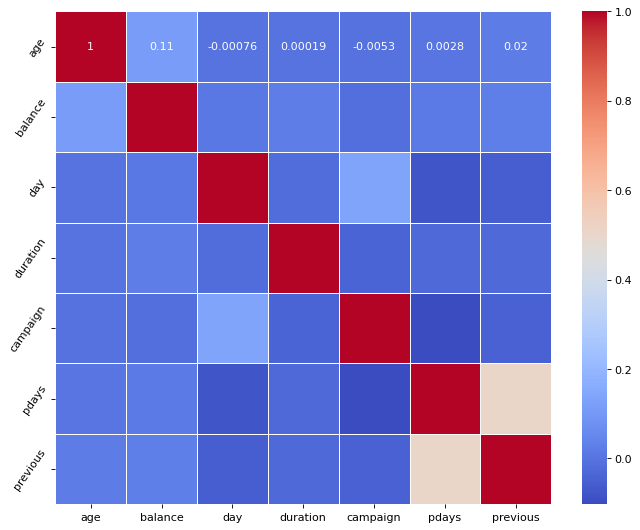

In [11]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8), dpi=80)
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True, linewidth=0.5)
plt.yticks(rotation=55)

# Save the heatmap as a PNG file
plt.savefig("correlation_heatmap.png", bbox_inches='tight')  # Save as PNG

# Show the plot
plt.show()

From our sample population, we find out that the majority of individuals work in management positions while the least number of individuals are entrepreneurs.

Age by Occupation: As expected, the retired are the ones who have the highest median age while student are the lowest.

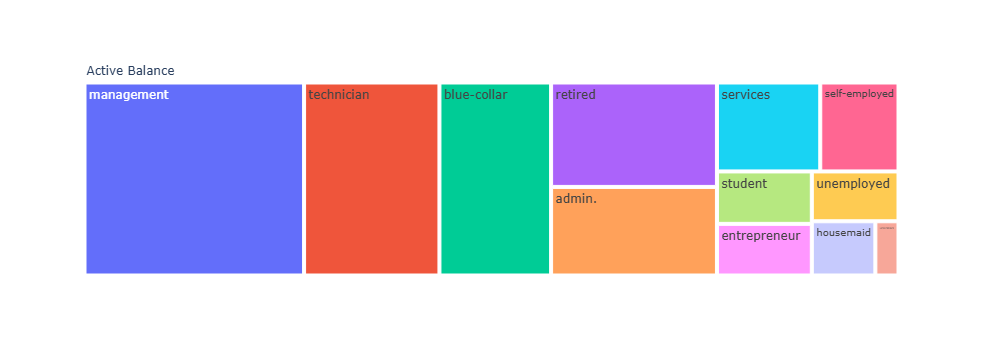

In [12]:
# Which occupation has most active balance?
sample  = df.rename(columns={"balance":"Active Balance","job":"Occupation"})
fig = px.treemap(sample, path=[px.Constant('Active Balance'),'Occupation'], values='Active Balance',
                   hover_data=['Occupation'])
fig.show()

The individuals in management occupations have high balances, which means they are more likely to deposit,while we have individuals whose occupation is unknown having the least balance,the unemployed also have low balances.

In [13]:
df['marital'].value_counts().tolist()

[6351, 3518, 1293]

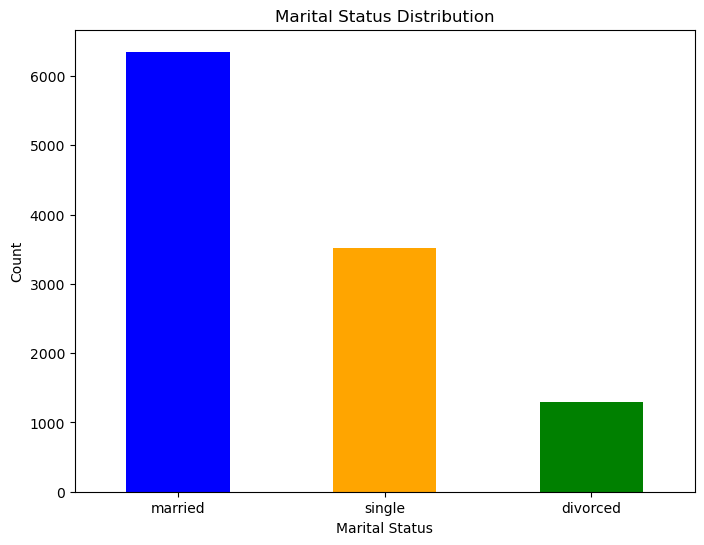

In [14]:
# Calculate Marital status value counts
marital_counts = df['marital'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
marital_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

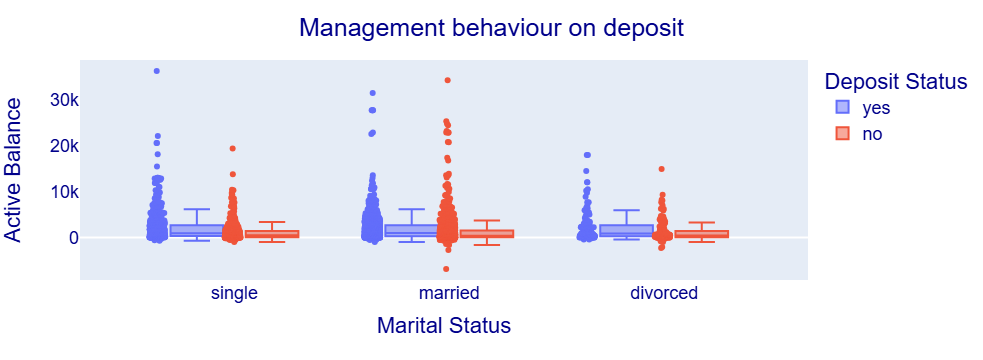

In [15]:
# Lets explore the impact of marital status on deposit
management = df[df.job=='management']
fig = px.box(management, x="marital", y="balance", 
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Management behaviour on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Marital Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

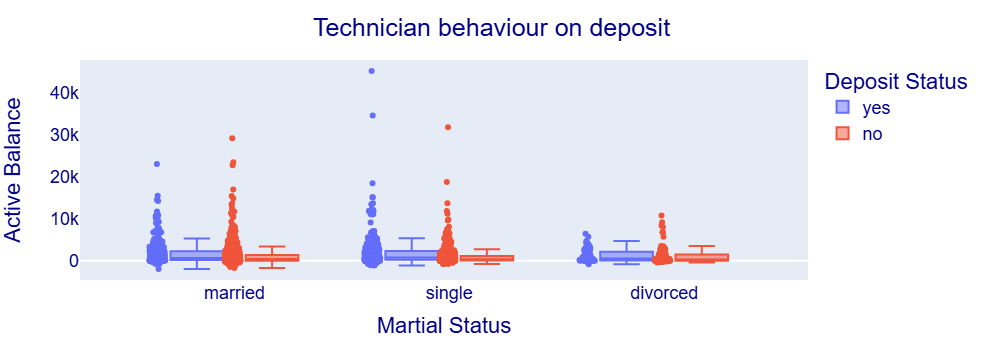

In [16]:
# Lets explore technicians behaviour on deposit
technician = df[df.job=='technician']
fig = px.box(technician, x="marital", y="balance", 
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Technician behaviour on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=18,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()


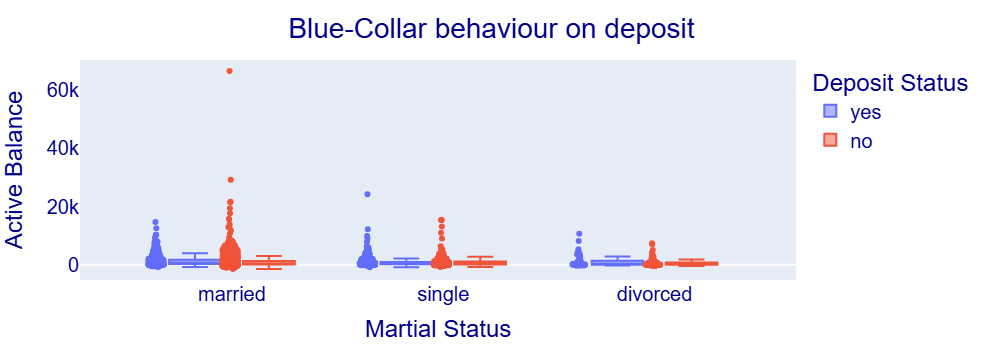

In [17]:
# Lets explore blue-collar's occupation behaviour on deposit
blue = df[df.job=='blue-collar']
fig = px.box(blue, x="marital", y="balance", 
             color="deposit", points="all",
            )
fig.update_traces(quartilemethod="exclusive")
fig.update_layout(
    title={
         'text': "Blue-Collar behaviour on deposit",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Martial Status",
    yaxis_title="Active Balance",
    legend_title="Deposit Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

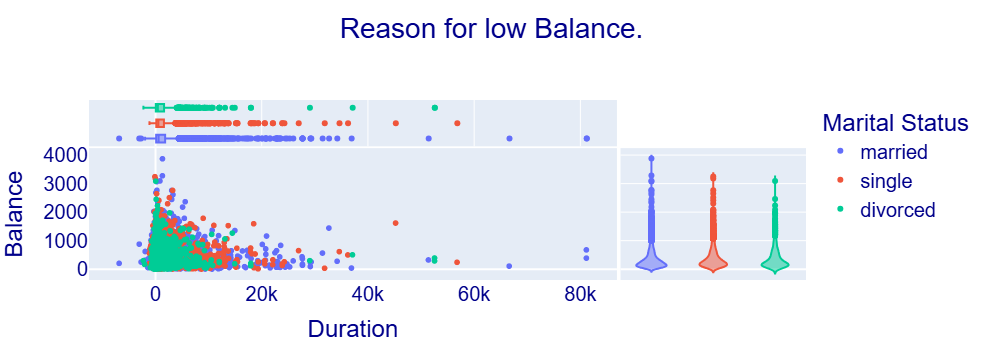

In [18]:
# Let's explore the possible reasons for low balance
fig = px.scatter(df, x="balance", y="duration", color="marital", 
                 marginal_x="box", marginal_y="violin",
                  title="Click on the legend items!")
fig.update_layout(
    title={
         'text': "Reason for low Balance.",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
    xaxis_title="Duration",
    yaxis_title=" Balance",
    legend_title="Marital Status",
    font=dict(
        family="Arial",
        size=20,
        color="DarkBlue"
    )
)
fig.update_layout(xaxis=dict(showgrid=False),
              yaxis=dict(showgrid=False)
)
fig.show()

Marital Status: As discussed previously, the impact of a divorce has a significant impact on the balance of the individual.

Education: The education level also significantly impacts the amount of balance a prospect has.

Loans: Whether the prospect has a previous loan significantly impacts the amount of balance he or she has.

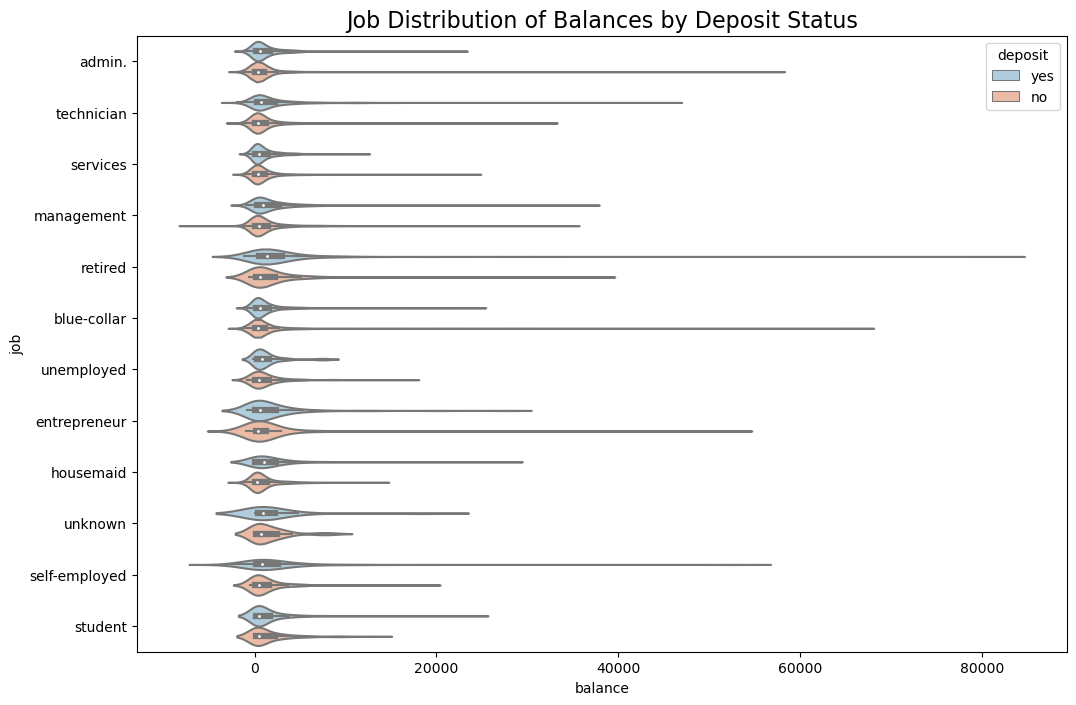

In [19]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

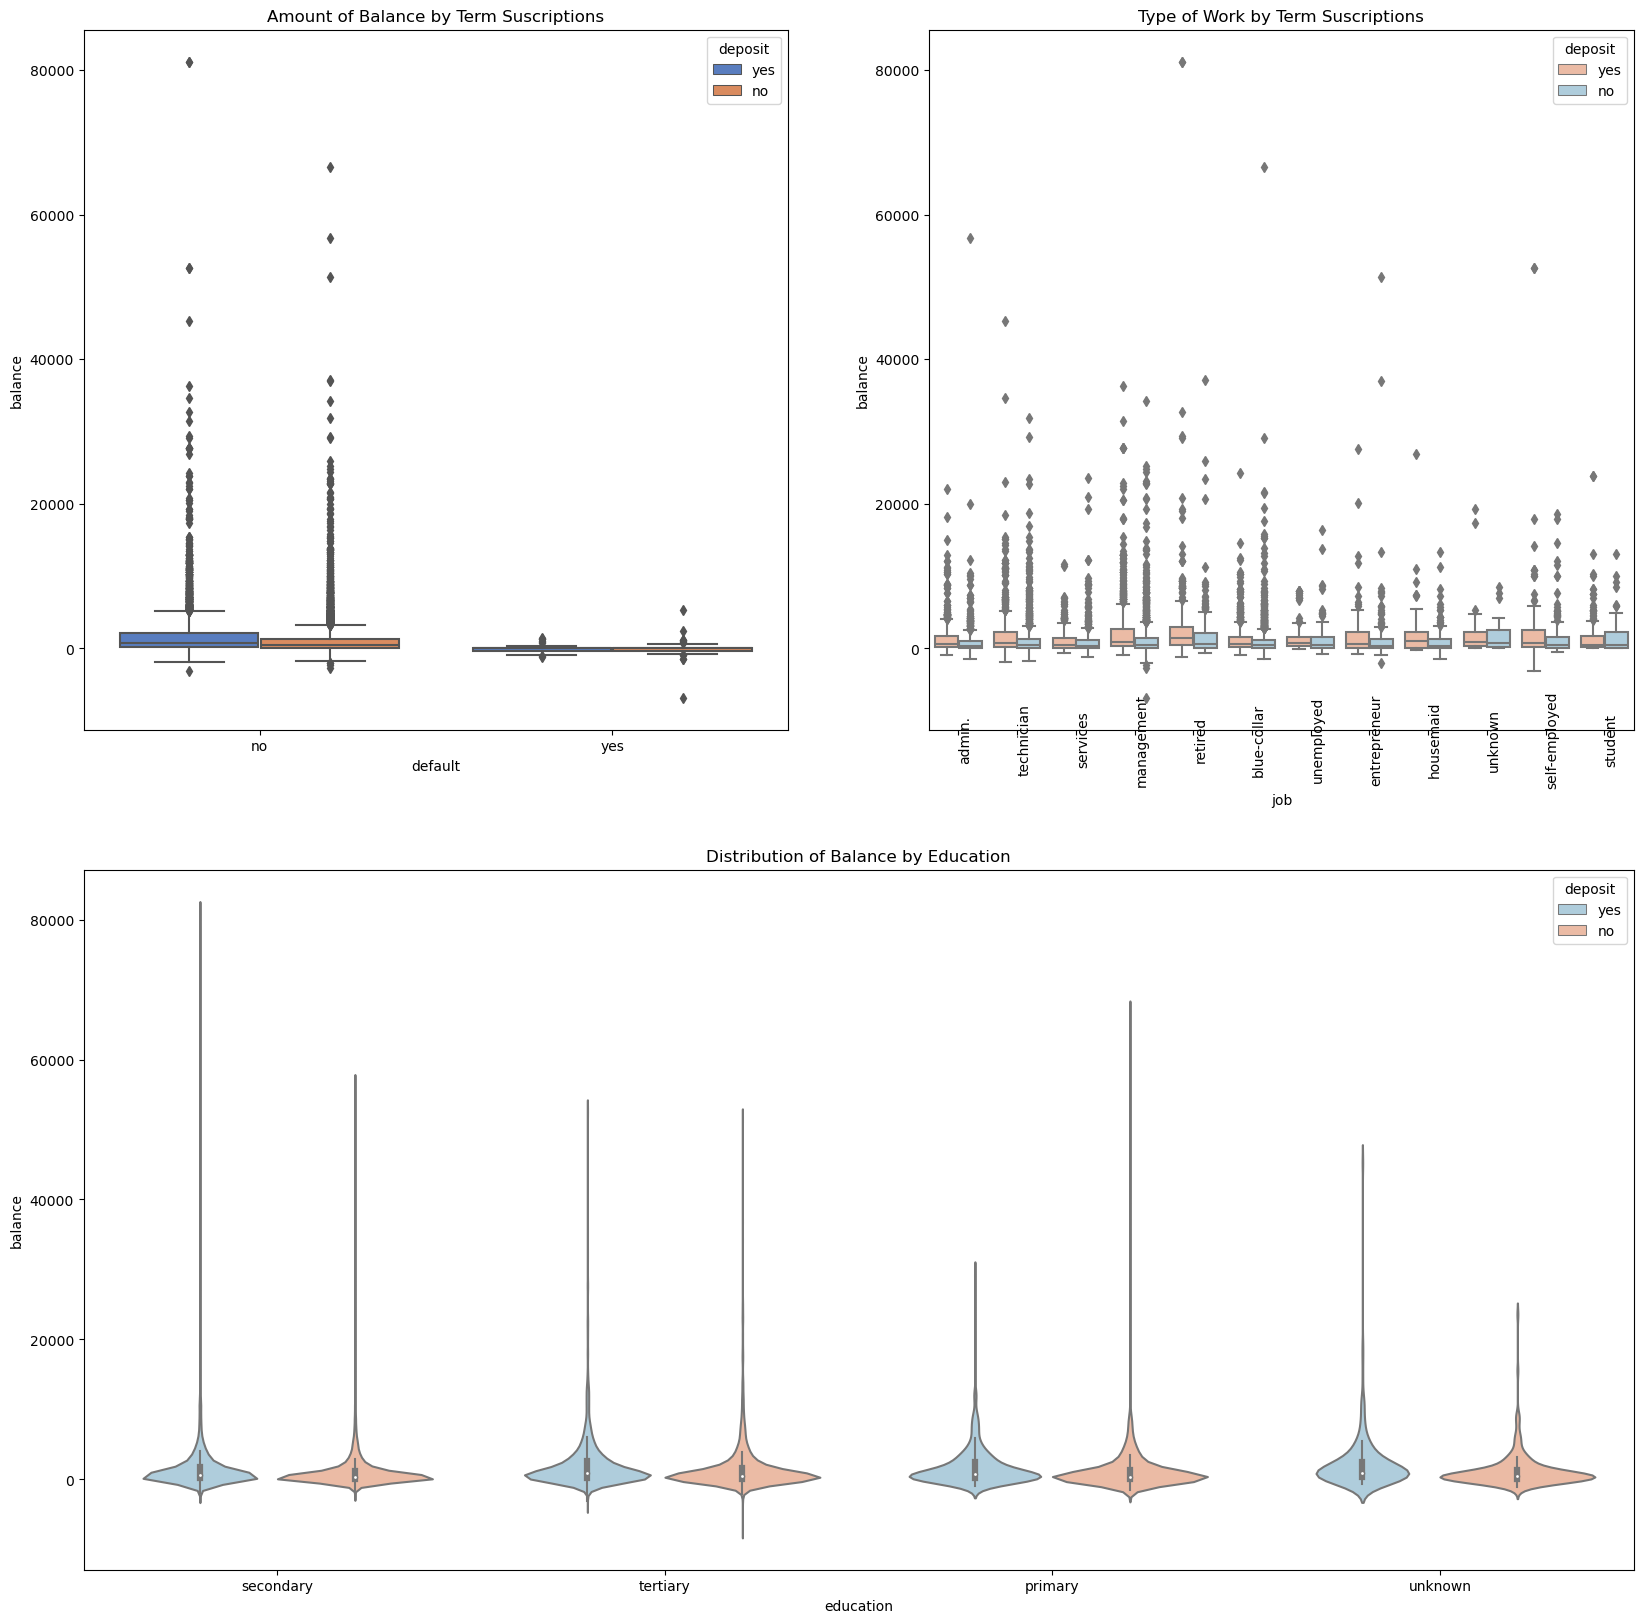

In [20]:
# plt.style.use('dark_background')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

deposit
no     5873
yes    5289
Name: count, dtype: int64


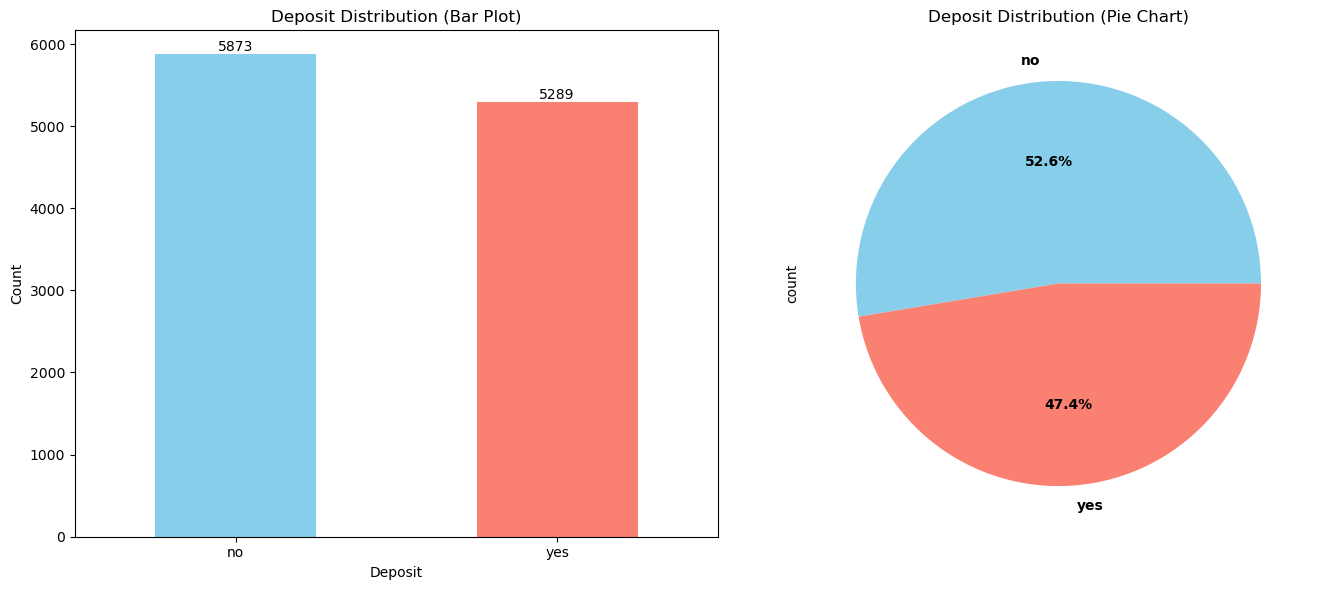

In [21]:
# Visualisation of the target variables
deposit_count = df["deposit"].value_counts()
print(deposit_count)
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# The target variables - Bar plot
deposit_count.plot(kind="bar", color=['skyblue', 'salmon'], ax=axes[0])
axes[0].set_xlabel('Deposit')
axes[0].set_ylabel('Count')
axes[0].set_title('Deposit Distribution (Bar Plot)')
axes[0].tick_params(axis='x', rotation=0)

# Add values above the bars
for i, count in enumerate(deposit_count):
    axes[0].annotate(str(count), xy=(i, count), ha='center', va='bottom')

# Visualisation of the target variables - Pie chart
deposit_count.plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'salmon'], ax=axes[1], textprops={"fontweight": "bold"})
axes[1].set_title('Deposit Distribution (Pie Chart)')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure as PNG
plt.savefig('Deposit_Distribution.png')

# Show the plots
plt.show()

In [22]:
df.head()

age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

In [23]:
# check for missing values and display the count of null values for each column
df.isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
age                     0
job                     0
marital                 0
education               0
default                 0
balance                 0
housing                 0
loan                    0
contact                 0
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome                0
deposit                 0

## Data Preprocessing

In [24]:
categorical_cols = ["job","marital","education","default","housing","loan","contact","month","poutcome","deposit"]

for column in categorical_cols:
    print(f"Unique Values in {column} column is:",df[column].unique())
    print("-"*100,"\n")

Unique Values in job column is: ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
---------------------------------------------------------------------------------------------------- 

Unique Values in marital column is: ['married' 'single' 'divorced']
---------------------------------------------------------------------------------------------------- 

Unique Values in education column is: ['secondary' 'tertiary' 'primary' 'unknown']
---------------------------------------------------------------------------------------------------- 

Unique Values in default column is: ['no' 'yes']
---------------------------------------------------------------------------------------------------- 

Unique Values in housing column is: ['yes' 'no']
---------------------------------------------------------------------------------------------------- 

Unique Values in loan column is: ['no' 'yes']
--------

In [25]:
# Define binary and nominal columns correctly
binary_cols = ["default", "housing", "loan", "deposit"]  # Binary columns should be yes/no or 0/1
nominal_cols = ["job","marital", "education", "contact", "month", "poutcome"]

# Ensure data types are consistent for label encoding
label_encoder = LabelEncoder()
for col in binary_cols:
    # Convert to string to avoid any potential issues
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])

# Perform OneHot encoding for nominal columns
onehot_encoder = OneHotEncoder()
encoded_cols = onehot_encoder.fit_transform(df[nominal_cols]).toarray()
encoded_df = pd.DataFrame(encoded_cols, columns=onehot_encoder.get_feature_names_out(nominal_cols))

# Concatenate the encoded columns with the original dataframe
df = pd.concat([df.drop(columns=nominal_cols), encoded_df], axis=1)

In [26]:
#Print the first few rows of the DataFrame to inspect it
df

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0       59        0     2343        1     0    5      1042         1     -1   
1       56        0       45        0     0    5      1467         1     -1   
2       41        0     1270        1     0    5      1389         1     -1   
3       55        0     2476        1     0    5       579         1     -1   
4       54        0      184        0     0    5       673         2     -1   
...    ...      ...      ...      ...   ...  ...       ...       ...    ...   
11157   33        0        1        1     0   20       257         1     -1   
11158   39        0      733        0     0   16        83         4     -1   
11159   32        0       29        0     0   19       156         2     -1   
11160   43        0        0        0     1    8         9         2    172   
11161   34        0        0        0     0    9       628         1     -1   

       previous  deposit  job_admin.  job_blue-collar  job_entrepreneur  \
0             0        1         1.0              0.0               0.0   
1             0        1         1.0              0.0               0.0   
2             0        1         0.0              0.0               0.0   
3             0        1         0.0              0.0               0.0   
4             0        1         1.0              0.0               0.0   
...         ...      ...         ...              ...               ...   
11157         0        0         0.0              1.0               0.0   
11158         0        0         0.0              0.0               0.0   
11159         0        0         0.0              0.0               0.0   
11160         5        0         0.0              0.0               0.0   
11161         0        0         0.0              0.0               0.0   

       job_housemaid  job_management  job_retired  job_self-employed  \
0                0.0             0.0          0.0                0.0   
1                0.0             0.0          0.0                0.0   
2                0.0             0.0          0.0                0.0   
3                0.0             0.0          0.0                0.0   
4                0.0             0.0          0.0                0.0   
...              ...             ...          ...                ...   
11157            0.0             0.0          0.0                0.0   
11158            0.0             0.0          0.0                0.0   
11159            0.0             0.0          0.0                0.0   
11160            0.0             0.0          0.0                0.0   
11161            0.0             0.0          0.0                0.0   

       job_services  job_student  job_technician  job_unemployed  job_unknown  \
0               0.0          0.0             0.0             0.0          0.0   
1               0.0          0.0             0.0             0.0          0.0   
2               0.0          0.0             1.0             0.0          0.0   
3               1.0          0.0             0.0             0.0          0.0   
4               0.0          0.0             0.0             0.0          0.0   
...             ...          ...             ...             ...          ...   
11157           0.0          0.0             0.0             0.0          0.0   
11158           1.0          0.0             0.0             0.0          0.0   
11159           0.0          0.0             1.0             0.0          0.0   
11160           0.0          0.0             1.0             0.0          0.0   
11161           0.0          0.0             1.0             0.0          0.0   

       marital_divorced  marital_married  marital_single  education_primary  \
0                   0.0              1.0             0.0                0.0   
1                   0.0              1.0             0.0                0.0   
2                   0.0              1.0             0.0                0.0   
3  

In [27]:
# Check for any extreme values
df.describe()

age       default       balance       housing          loan  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948      0.015051   1528.538524      0.473123      0.130801   
std       11.913369      0.121761   3225.413326      0.499299      0.337198   
min       18.000000      0.000000  -6847.000000      0.000000      0.000000   
25%       32.000000      0.000000    122.000000      0.000000      0.000000   
50%       39.000000      0.000000    550.000000      0.000000      0.000000   
75%       49.000000      0.000000   1708.000000      1.000000      0.000000   
max       95.000000      1.000000  81204.000000      1.000000      1.000000   

                day      duration      campaign         pdays      previous  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      15.658036    371.993818      2.508421     51.330407      0.832557   
std        8.420740    347.128386      2.722077    108.758282      2.292007   
min        1.000000      2.000000      1.000000     -1.000000      0.000000   
25%        8.000000    138.000000      1.000000     -1.000000      0.000000   
50%       15.000000    255.000000      2.000000     -1.000000      0.000000   
75%       22.000000    496.000000      3.000000     20.750000      1.000000   
max       31.000000   3881.000000     63.000000    854.000000     58.000000   

            deposit    job_admin.  job_blue-collar  job_entrepreneur  \
count  11162.000000  11162.000000     11162.000000      11162.000000   
mean       0.473840      0.119513         0.174162          0.029385   
std        0.499338      0.324405         0.379266          0.168892   
min        0.000000      0.000000         0.000000          0.000000   
25%        0.000000      0.000000         0.000000          0.000000   
50%        0.000000      0.000000         0.000000          0.000000   
75%        1.000000      0.000000         0.000000          0.000000   
max        1.000000      1.000000         1.000000          1.000000   

       job_housemaid  job_management   job_retired  job_self-employed  \
count   11162.000000    11162.000000  11162.000000       11162.000000   
mean        0.024548        0.229887      0.069701           0.036284   
std         0.154749        0.420779      0.254653           0.187004   
min         0.000000        0.000000      0.000000           0.000000   
25%         0.000000        0.000000      0.000000           0.000000   
50%         0.000000        0.000000      0.000000           0.000000   
75%         0.000000        0.000000      0.000000           0.000000   
max         1.000000        1.000000      1.000000           1.000000   

       job_services   job_student  job_technician  job_unemployed  \
count  11162.000000  11162.000000    11162.000000    11162.000000   
mean       0.082691      0.032252        0.163322        0.031984   
std        0.275427      0.176677        0.369676        0.175964   
min        0.000000      0.000000        0.000000        0.000000   
25%        0.000000      0.000000        0.000000        0.000000   
50%        0.000000      0.000000        0.000000        0.000000   
75%        0.000000      0.000000        0.000000        0.000000   
max        1.000000      1.000000        1.000000        1.000000   

        job_unknown  marital_divorced  marital_married  marital_single  \
count  11162.000000      11162.000000     11162.000000    11162.000000   
mean       0.006271          0.115839         0.568984        0.315176   
std        0.078946          0.320047         0.495241        0.464607   
min        0.000000          0.000000         0.000000        0.000000   
25%        0.000000          0.000000         0.000000        0.000000   
50%        0.000000          0.000000         1.000000        0.000000   
75%        0.000000          0.000000         1.000000        1.000000   
max        1.000000          1.000000         1.000000        1.000000 

In [28]:
#Checking Skewness of Continous Features
cols = ["age","balance","duration","day","campaign"]
df[cols].skew().to_frame().rename(columns={0:"Feature Skewness"})

Feature Skewness
age               0.862780
balance           8.224619
duration          2.143695
day               0.111330
campaign          5.545578

The balance feature exhibits a significant right-skewness, indicating the existence of positive outliers. Such skewness may adversely affect the effectiveness of certain machine learning models, such as Decision Trees and Linear Models. To address this right-skewed distribution, we can apply a log-normal transformation to achieve a more normalized distribution.

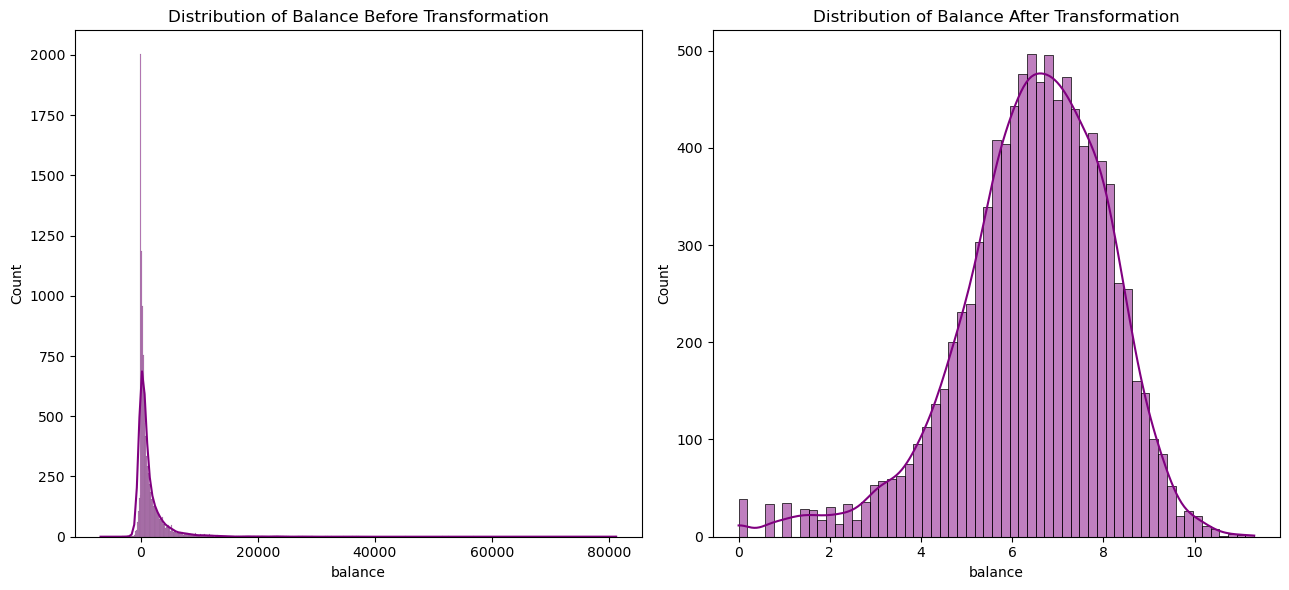

In [29]:
#  Performing Log Transformation on balance Column
old_balance = df["balance"]
df["balance"] = np.log(df["balance"])

# Visualizing balance Before and After Transformation
plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.histplot(old_balance, color="purple", kde=True)
plt.title("Distribution of Balance Before Transformation")

plt.subplot(1,2,2)
sns.histplot(df["balance"], color="purple", kde=True)
plt.title("Distribution of Balance After Transformation")
plt.tight_layout()
plt.show()

After implementing the log-normal transformation, the balance feature now exhibits a normal distribution. This adjustment will enable the model to detect more relevant patterns and construct a more accurate model

## Train/Test Split

In [30]:
print(df['deposit'].value_counts())

deposit
0    5873
1    5289
Name: count, dtype: int64


In [31]:
# Defining features (X) and target variable (y)
X = df.drop(columns=["deposit"])
y = df["deposit"]

In [32]:
X

age  default   balance  housing  loan  day  duration  campaign  pdays  \
0       59        0  7.759187        1     0    5      1042         1     -1   
1       56        0  3.806662        0     0    5      1467         1     -1   
2       41        0  7.146772        1     0    5      1389         1     -1   
3       55        0  7.814400        1     0    5       579         1     -1   
4       54        0  5.214936        0     0    5       673         2     -1   
...    ...      ...       ...      ...   ...  ...       ...       ...    ...   
11157   33        0  0.000000        1     0   20       257         1     -1   
11158   39        0  6.597146        0     0   16        83         4     -1   
11159   32        0  3.367296        0     0   19       156         2     -1   
11160   43        0      -inf        0     1    8         9         2    172   
11161   34        0      -inf        0     0    9       628         1     -1   

       previous  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0             0         1.0              0.0               0.0            0.0   
1             0         1.0              0.0               0.0            0.0   
2             0         0.0              0.0               0.0            0.0   
3             0         0.0              0.0               0.0            0.0   
4             0         1.0              0.0               0.0            0.0   
...         ...         ...              ...               ...            ...   
11157         0         0.0              1.0               0.0            0.0   
11158         0         0.0              0.0               0.0            0.0   
11159         0         0.0              0.0               0.0            0.0   
11160         5         0.0              0.0               0.0            0.0   
11161         0         0.0              0.0               0.0            0.0   

       job_management  job_retired  job_self-employed  job_services  \
0                 0.0          0.0                0.0           0.0   
1                 0.0          0.0                0.0           0.0   
2                 0.0          0.0                0.0           0.0   
3                 0.0          0.0                0.0           1.0   
4                 0.0          0.0                0.0           0.0   
...               ...          ...                ...           ...   
11157             0.0          0.0                0.0           0.0   
11158             0.0          0.0                0.0           1.0   
11159             0.0          0.0                0.0           0.0   
11160             0.0          0.0                0.0           0.0   
11161             0.0          0.0                0.0           0.0   

       job_student  job_technician  job_unemployed  job_unknown  \
0              0.0             0.0             0.0          0.0   
1              0.0             0.0             0.0          0.0   
2              0.0             1.0             0.0          0.0   
3              0.0             0.0             0.0          0.0   
4              0.0             0.0             0.0          0.0   
...            ...             ...             ...          ...   
11157          0.0             0.0             0.0          0.0   
11158          0.0             0.0             0.0          0.0   
11159          0.0             1.0             0.0          0.0   
11160          0.0             1.0             0.0          0.0   
11161          0.0             1.0             0.0          0.0   

       marital_divorced  marital_married  marital_single  education_primary  \
0                   0.0              1.0             0.0                0.0   
1                   0.0              1.0             0.0                0.0   
2                   0.0              1.0             0.0                0.0   
3                   0.0              1.0             0.0                0.0   
4                   

In [33]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int32

### Train/Test Split

In [34]:
#Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling

In [35]:
# Step 2: Identify numerical columns that require scaling
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Step 3: Check for infinity or NaN values
print("NaN values before replacement:")
print(X_train[numerical_columns].isna().sum())
print("Infinity values before replacement:")
print(np.isinf(X_train[numerical_columns]).sum())

# Step 4: Replace infinities with NaN
X_train[numerical_columns] = X_train[numerical_columns].replace([np.inf, -np.inf], np.nan)
X_test[numerical_columns] = X_test[numerical_columns].replace([np.inf, -np.inf], np.nan)

# Step 5: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train[numerical_columns] = imputer.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = imputer.transform(X_test[numerical_columns])

# Step 6: Scale the numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

print("Data preprocessing completed successfully.")

NaN values before replacement:
age           0
balance     549
day           0
duration      0
campaign      0
pdays         0
previous      0
dtype: int64
Infinity values before replacement:
age           0
balance     613
day           0
duration      0
campaign      0
pdays         0
previous      0
dtype: int64
Data preprocessing completed successfully.


### Hyper Parameter Tuning

In [36]:
# Random Forest
def tune_random_forest(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Decision Tree
def tune_decision_tree(X_train, y_train):
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    dt = DecisionTreeClassifier(random_state=42)
    grid_search = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# XGBoost
def tune_xgboost(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.01, 0.1, 0.3]
    }
    xgb = XGBClassifier(random_state=42)
    grid_search = GridSearchCV(xgb, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Logistic Regression
def tune_logistic_regression(X_train, y_train):
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }
    lr = LogisticRegression(random_state=42, solver='liblinear')
    grid_search = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# MLP
def tune_mlp(X_train, y_train):
    param_grid = {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
    mlp = MLPClassifier(random_state=42, max_iter=1000)
    grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Custom Keras Classifier
class CustomKerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, input_shape, optimizer='adam', neurons=64, layers=2, dropout_rate=0.2):
        self.input_shape = input_shape
        self.optimizer = optimizer
        self.neurons = neurons
        self.layers = layers
        self.dropout_rate = dropout_rate
        self.model = None

    def create_model(self):
        model = Sequential()
        model.add(Dense(self.neurons, activation='relu', input_shape=self.input_shape))
        model.add(Dropout(self.dropout_rate))
        
        for _ in range(self.layers - 1):
            model.add(Dense(self.neurons, activation='relu'))
            model.add(Dropout(self.dropout_rate))
        
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=self.optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        if self.model is None:
            self.model = self.create_model()
        self.model.fit(X, y, epochs=100, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

    def get_params(self, deep=True):
        return {
            "input_shape": self.input_shape,
            "optimizer": self.optimizer,
            "neurons": self.neurons,
            "layers": self.layers,
            "dropout_rate": self.dropout_rate
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

def tune_dnn(X_train, y_train):
    param_grid = {
        'optimizer': ['adam', 'rmsprop'],
        'neurons': [32, 64, 128],
        'layers': [2, 3, 4],
        'dropout_rate': [0.2, 0.3, 0.4]
    }
    dnn = CustomKerasClassifier(input_shape=(X_train.shape[1],))
    grid_search = GridSearchCV(dnn, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Main execution
if __name__ == "__main__":
    
    # Tune and evaluate models
    models = {
        'Random Forest': tune_random_forest,
        'Decision Tree': tune_decision_tree,
        'XGBoost': tune_xgboost,
        'Logistic Regression': tune_logistic_regression,
        'MLP': tune_mlp,
        'DNN': tune_dnn
    }
    
    for name, tune_func in models.items():
        print(f"\nTuning {name}...")
        best_model = tune_func(X_train, y_train)
        print(f"{name} Best Parameters: {best_model.get_params()}")


Tuning Random Forest...
Random Forest Best Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}

Tuning Decision Tree...
Decision Tree Best Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}

Tuning XGBoost...
XGBoost Best Parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': No

## Modeling

### 1.Random Forest

In [37]:
rfc = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=20,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=5,
    min_weight_fraction_leaf=0.0,
    n_estimators=300,
    n_jobs=None,
    oob_score=False,
    random_state=42,
    verbose=0,
    warm_start=False
)

# Fit the model to the training data
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=300,
                       random_state=42)

In [38]:
ytrainpred_rfc = rfc.predict(X_train)
ytestpred_rfc  = rfc.predict(X_test)

print("Random forest Accuracy Score on Training Data is",round(accuracy_score(y_train,ytrainpred_rfc)*100,2),"%")
print("Random forest Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_rfc)*100,2),"%")

Random forest Accuracy Score on Training Data is 96.89 %
Random forest Accuracy Score on Testing Data  is 85.58 %


In [39]:
# Print the classification report to evaluate the performance of rfc
print(classification_report(y_test, ytestpred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1205
           1       0.82      0.89      0.85      1028

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



#### Model Evaluation using Confusion Matrix

[[998 207]
 [115 913]]


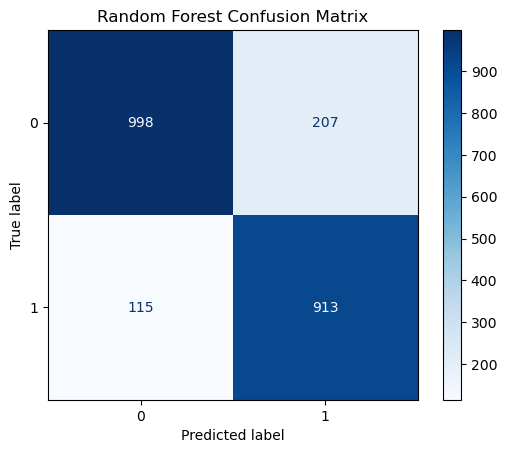

In [40]:
cnf_rfc = confusion_matrix(y_test, ytestpred_rfc)
print(cnf_rfc)

# Plot confusion matrix without gridlines
disp_rfc = ConfusionMatrixDisplay(confusion_matrix=cnf_rfc, display_labels=rfc.classes_)
disp_rfc.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('Random Forest Confusion Matrix')
plt.savefig('RF Confusion_Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

The model demonstrates a strong true positive rate by accurately identifying a high number of positive cases, showcasing its effectiveness in correctly classifying desired outcomes. However, there is room for improvement in reducing the false negative rate, as the model appears to have missed identifying some actual positive cases. This highlights the need for further refinement to ensure the model's ability to capture all positive instances accurately.

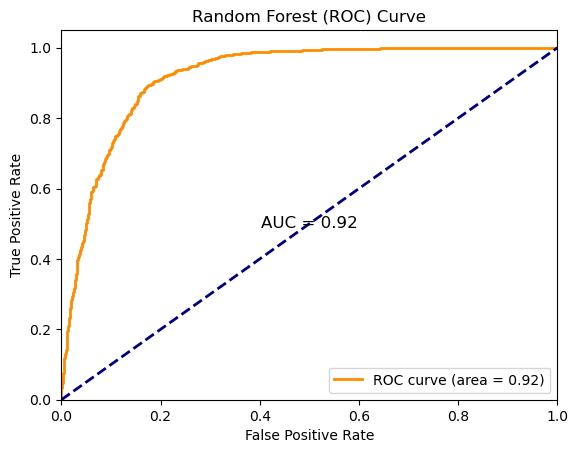

In [41]:
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('Random Forest (ROC)Curve.png')
plt.show()

An AUC (Area Under the Curve) value of 0.91 indicates the model possesses robust discriminative power, signifying its high capability to differentiate between positive and negative instances, thereby making accurate predictions. This suggests the model has a relatively elevated probability of assigning a higher rank to a randomly selected positive instance than a randomly chosen negative one.

#### Finding Importance of Features in RandomForest Mode

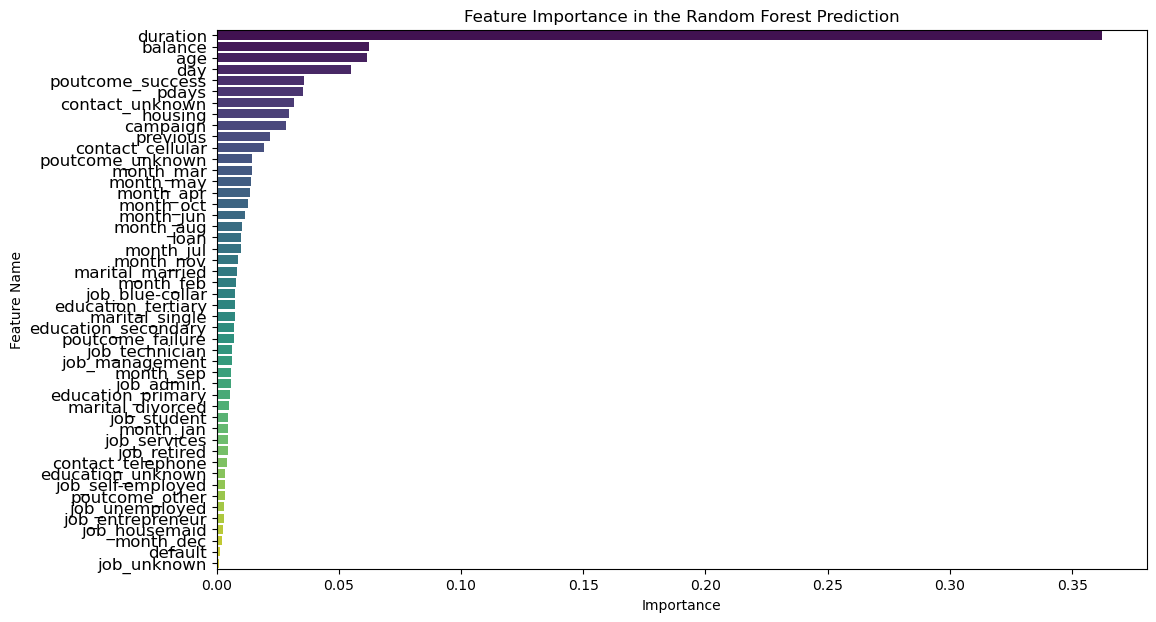

In [42]:
imp_features = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":rfc.feature_importances_})

features = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="viridis")
plt.title("Feature Importance in the Random Forest Prediction")
plt.yticks(size=12)
plt.savefig('RF feature imp.png')
plt.show()

#### 2.XGBoost

In [43]:
# Create and fit XGBoost classifier
xgb_clf = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.3,
    max_depth=4,
    n_estimators=100,
    random_state=42,
)

# Handle the missing value parameter correctly
xgb_clf.set_params(missing=np.nan)

# Fit the model to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [44]:
# Predict labels for the training data and test data
y_train_pred_xgb = xgb_clf.predict(X_train)
y_test_pred_xgb = xgb_clf.predict(X_test)

# Convert string labels to integers for consistency
#label_encoder = LabelEncoder()
#y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
#y_test_encoded = label_encoder.transform(y_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
test_accuracy = accuracy_score(y_test, y_test_pred_xgb)

print("XGBOOST Accuracy Score on Training Data is",round(accuracy_score(y_train, y_train_pred_xgb)*100,2),"%")
print("XGBOOST Accuracy Score on Testing Data  is",round(accuracy_score(y_test, y_test_pred_xgb)*100,2),"%")

XGBOOST Accuracy Score on Training Data is 90.25 %
XGBOOST Accuracy Score on Testing Data  is 85.45 %


In [45]:
# Print the classification report to evaluate the performance of XGBOOST
print(classification_report(y_test, y_test_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1205
           1       0.82      0.87      0.85      1028

    accuracy                           0.85      2233
   macro avg       0.85      0.86      0.85      2233
weighted avg       0.86      0.85      0.85      2233



[[1015  190]
 [ 135  893]]


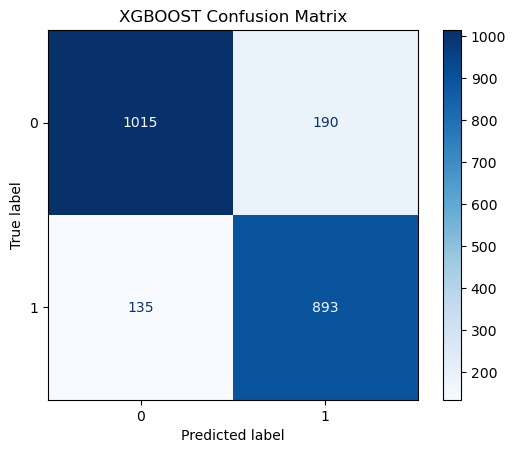

In [46]:
cnf_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print(cnf_xgb)

# Plot confusion matrix without gridlines
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cnf_xgb, display_labels=rfc.classes_)
disp_xgb.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('XGBOOST Confusion Matrix')
plt.savefig('XGBOOST Confusion_Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

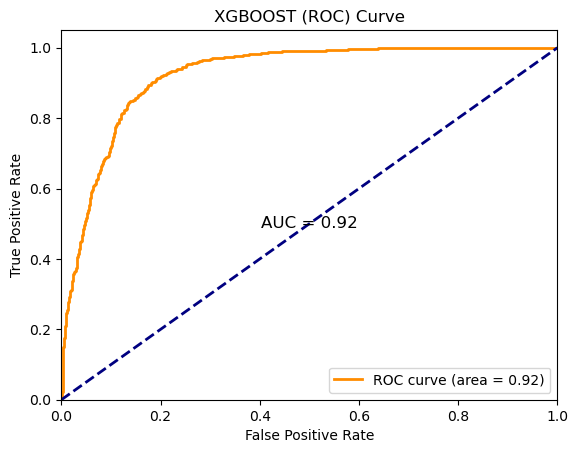

In [47]:
y_pred_proba = xgb_clf.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBOOST (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('XGB (ROC)Curve.png')
plt.show()

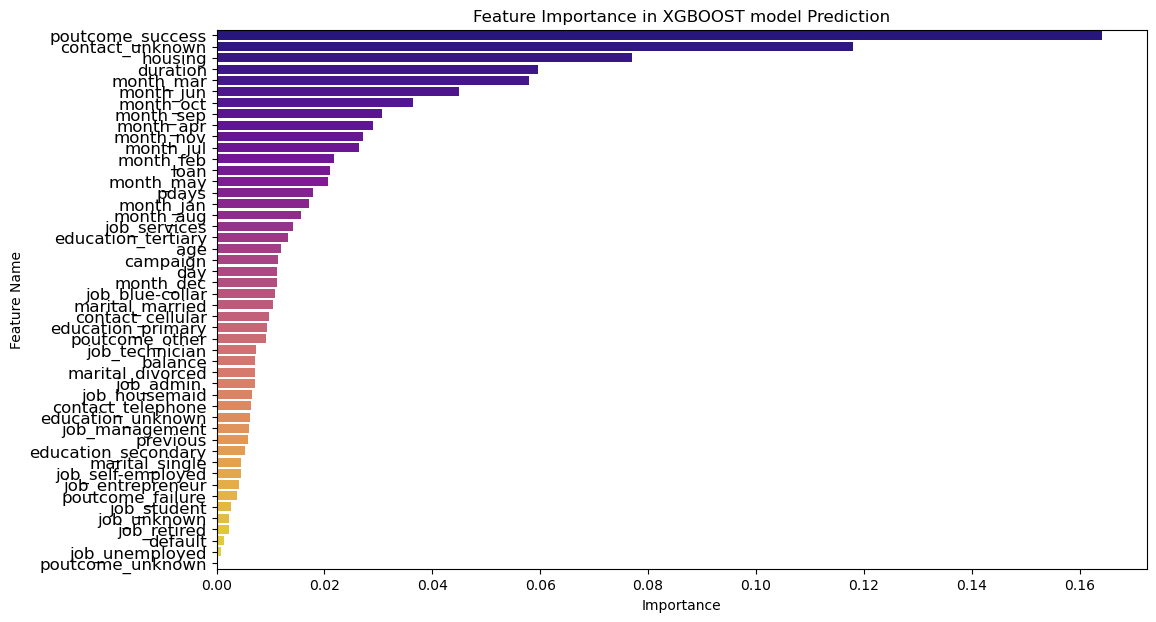

In [48]:
imp_features = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":xgb_clf.feature_importances_})

features = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="plasma")
plt.title("Feature Importance in XGBOOST model Prediction")
plt.yticks(size=12)
plt.savefig('XGB feature imp.png')
plt.show()

#### 3.Decision Tree

In [49]:
dtree = DecisionTreeClassifier(
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=10,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    random_state=42,
    splitter='best'
)

# Fit the model to the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [50]:
ytrainpred_dtree = dtree.predict(X_train)
ytestpred_dtree  = rfc.predict(X_test)

print("Decision Tree Accuracy Score on Training Data is",round(accuracy_score(y_train,ytrainpred_dtree)*100,2),"%")
print("Decision Tree Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_dtree)*100,2),"%")

Decision Tree Accuracy Score on Training Data is 87.84 %
Decision Tree Accuracy Score on Testing Data  is 85.58 %


In [51]:
# Print the classification report to evaluate the performance of dtree
print(classification_report(y_test, ytestpred_dtree))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      1205
           1       0.82      0.89      0.85      1028

    accuracy                           0.86      2233
   macro avg       0.86      0.86      0.86      2233
weighted avg       0.86      0.86      0.86      2233



[[998 207]
 [115 913]]


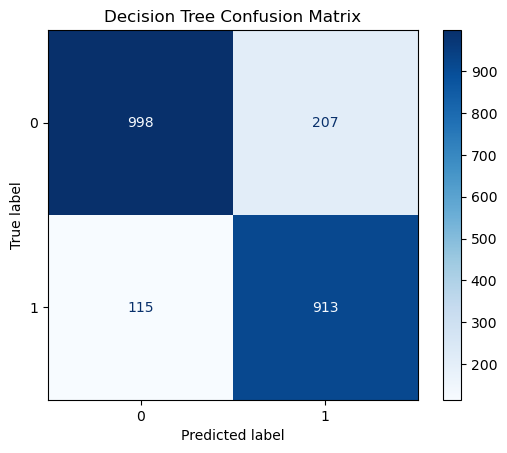

In [52]:
cnf_dtree = confusion_matrix(y_test, ytestpred_dtree)
print(cnf_dtree)

# Plot confusion matrix without gridlines
disp_dtree = ConfusionMatrixDisplay(confusion_matrix=cnf_dtree, display_labels=dtree.classes_)
disp_dtree.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('Decision Tree Confusion Matrix')
plt.savefig('Decision_Tree_Confusion_Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

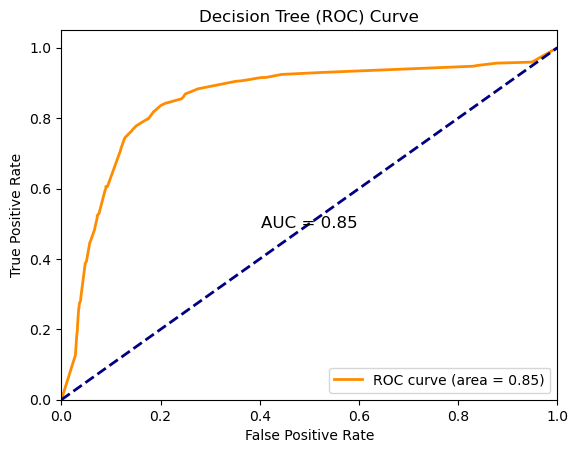

In [53]:
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('DT (ROC)Curve.png')
plt.show()

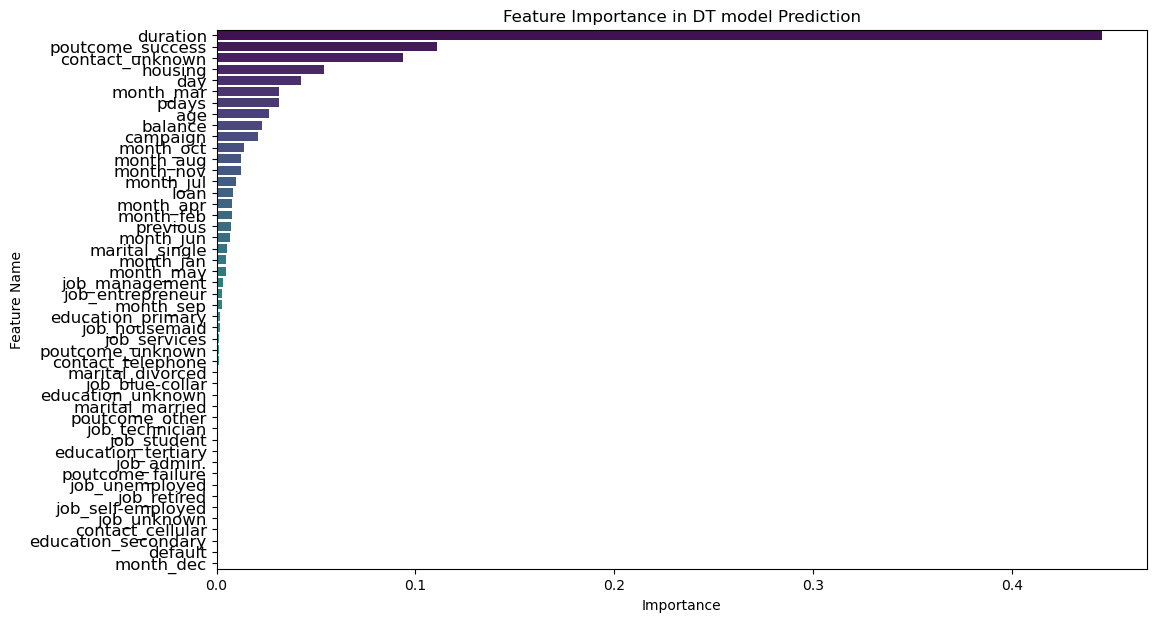

In [54]:
imp_features = pd.DataFrame({"Feature Name":X_train.columns,
                       "Importance":dtree.feature_importances_})

features = imp_features.sort_values(by="Importance",ascending=False)

plt.figure(figsize=(12,7))
sns.barplot(x="Importance", y="Feature Name", data=features, palette="viridis")
plt.title("Feature Importance in DT model Prediction")
plt.yticks(size=12)
plt.savefig('DTree feature imp.png')
plt.show()

#### 4.Logistic Regression

In [55]:
LR_clf = LogisticRegression(
    C=0.1,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    l1_ratio=None,
    max_iter=100,
    multi_class='auto',
    n_jobs=None,
    penalty='l2',
    random_state=42,
    solver='liblinear',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

# Fit the model to the training data
LR_clf.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [56]:
ytrainpred_LR = LR_clf.predict(X_train)
ytestpred_LR  = LR_clf.predict(X_test)

print("Logistic Regression Accuracy Score on Training Data is",round(accuracy_score(y_train,ytrainpred_LR)*100,2),"%")
print("Logistic Regression Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_LR)*100,2),"%")

Logistic Regression Accuracy Score on Training Data is 82.95 %
Logistic Regression Accuracy Score on Testing Data  is 82.27 %


In [57]:
# Print the classification report to evaluate the performance of LR
print(classification_report(y_test, ytestpred_LR))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84      1205
           1       0.81      0.80      0.81      1028

    accuracy                           0.82      2233
   macro avg       0.82      0.82      0.82      2233
weighted avg       0.82      0.82      0.82      2233



[[1015  190]
 [ 206  822]]


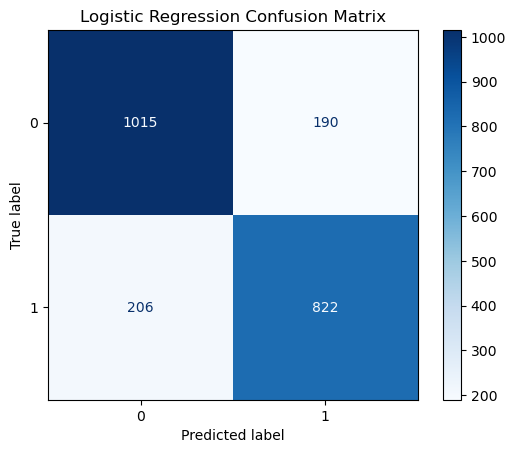

In [58]:
cnf_LR = confusion_matrix(y_test, ytestpred_LR)
print(cnf_LR)

# Plot confusion matrix without gridlines
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cnf_LR, display_labels=LR_clf.classes_)
disp_LR.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('Logistic Regression Confusion Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

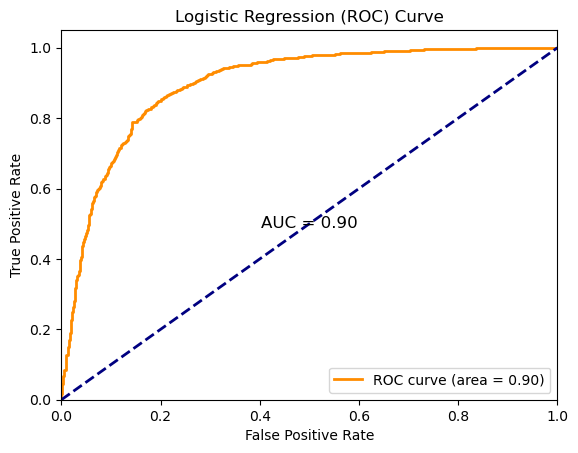

In [59]:
y_pred_proba = LR_clf.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('LR (ROC)Curve.png')
plt.show()

An Area Under the Curve (AUC) value of 0.90 suggests that the LR model has a strong ability to distinguish between positive and negative instances, this indicates that the model performs well in differentiating between customers who opened deposit accounts and those who did not. It has good discriminative power and is effective in making accurate predictions.

[ 0.01519889  0.02100343  0.15758295 -0.7230106  -0.50149145  0.01410948
  1.8295131  -0.25844854  0.02543881  0.05141106  0.16740804 -0.10793908
 -0.1929464  -0.22095229 -0.02067168  0.43187126 -0.11044804 -0.09946034
  0.59197697  0.01603638  0.11460156 -0.16459835  0.17230291 -0.02479342
  0.25736853 -0.16524268  0.0893261   0.30198062  0.17881399  0.69081854
  0.50945906 -0.79539957  0.09633669 -0.66607031  0.55071684 -0.12888303
 -0.80304181 -0.82543973  0.34273381  1.3912168  -0.50528483 -0.73763174
  0.93378261  0.75644273 -0.36001412 -0.23259104  1.56498591 -0.56750273]


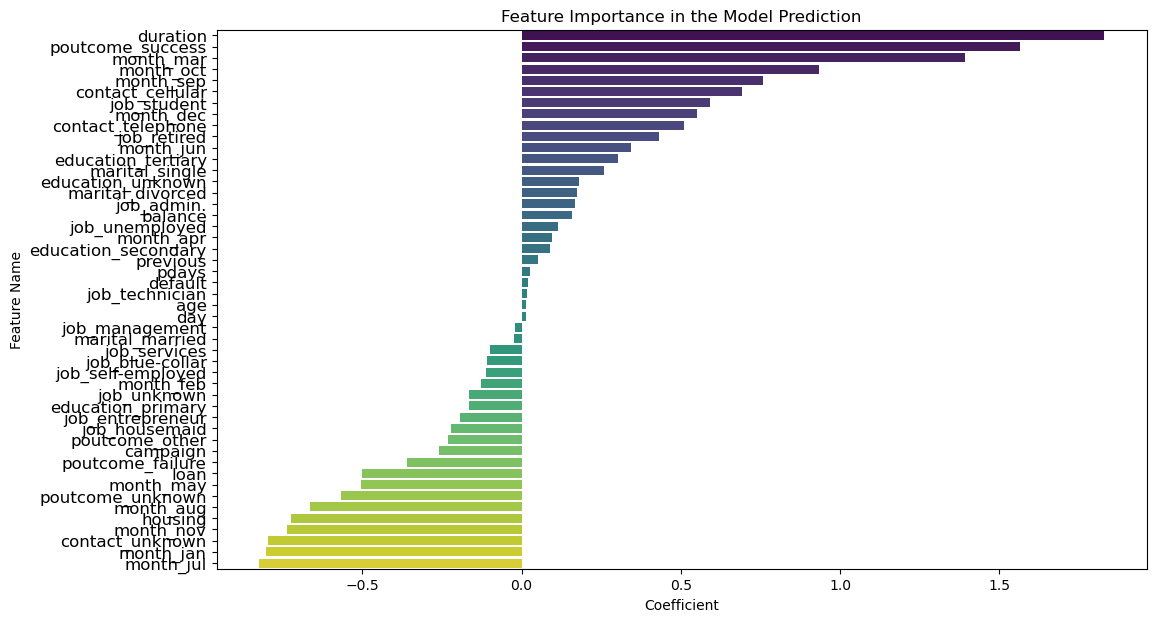

In [60]:
# Get feature coefficients from the trained logistic regression model
coefficients = LR_clf.coef_[0]
print(coefficients)

# Create a DataFrame to store feature names and their coefficients
imp_features = pd.DataFrame({"Feature Name": X_train.columns, "Coefficient": coefficients})

# Sort the features based on their coefficients
features = imp_features.sort_values(by="Coefficient", ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 7))
sns.barplot(x="Coefficient", y="Feature Name", data=features, palette="viridis")
plt.title("Feature Importance in the Model Prediction")
plt.yticks(size=12)
plt.savefig('LR feature imp.png')
plt.show()

#### 5.Multilayer Perceprton (MLP)

In [61]:
mlp = MLPClassifier(
    activation='relu',
    alpha=0.01,
    batch_size='auto',
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=False,
    epsilon=1e-08,
    hidden_layer_sizes=(50,),
    learning_rate='constant',
    learning_rate_init=0.001,
    max_fun=15000,
    max_iter=1000,
    momentum=0.9,
    n_iter_no_change=10,
    nesterovs_momentum=True,
    power_t=0.5,
    random_state=42,
    shuffle=True,
    solver='adam',
    tol=0.0001,
    validation_fraction=0.1,
    verbose=False,
    warm_start=False
)

# Fit the model to the training data
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(50,), max_iter=1000,
              random_state=42)

In [62]:
ytrainpred_mlp = mlp.predict(X_train)
ytestpred_mlp  = mlp.predict(X_test)

print("MLP Accuracy Score on Training Data is",round(accuracy_score(y_train,ytrainpred_mlp)*100,2),"%")
print("MLP Regression Accuracy Score on Testing Data  is",round(accuracy_score(y_test,ytestpred_mlp)*100,2),"%")

MLP Accuracy Score on Training Data is 93.64 %
MLP Regression Accuracy Score on Testing Data  is 82.62 %


In [63]:
# Print the classification report to evaluate the performance of LR
print(classification_report(y_test, ytestpred_mlp))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1205
           1       0.81      0.82      0.81      1028

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



[[1004  201]
 [ 187  841]]


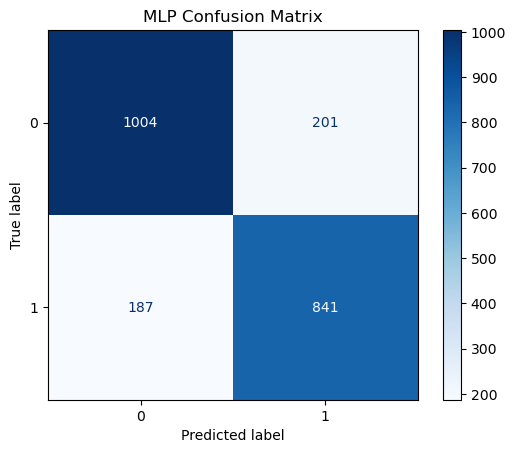

In [64]:
cnf_mlp = confusion_matrix(y_test, ytestpred_mlp)
print(cnf_mlp)

# Plot confusion matrix without gridlines
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cnf_mlp, display_labels=mlp.classes_)
disp_mlp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.grid(False)
plt.title('MLP Confusion Matrix')
plt.savefig('MLP Confusion Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

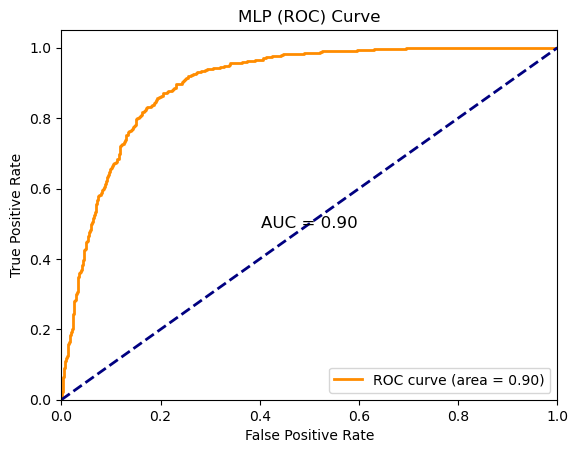

In [65]:
y_pred_proba = mlp.predict_proba(X_test)[:][:,1]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('MLP (ROC)Curve.png')
plt.show()

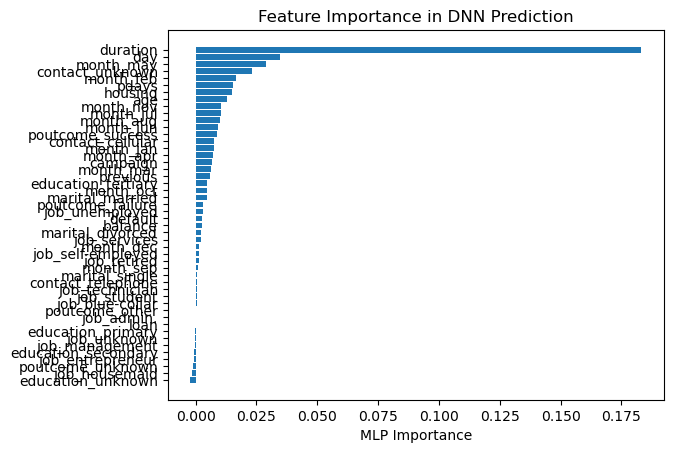

In [66]:
# Calculate permutation feature importance
result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Plot feature importances
sorted_idx = result.importances_mean.argsort()
plt.barh(range(X_test.shape[1]), result.importances_mean[sorted_idx])
plt.yticks(range(X_test.shape[1]), np.array(X_test.columns)[sorted_idx])
plt.title("Feature Importance in MLP Prediction")
plt.xlabel("MLP Importance")
plt.savefig('MLP feature imp.png')
plt.show()

#### 6.Deep Neural Network (DNN)

In [76]:
from keras.optimizers import RMSprop  # Import RMSprop optimizer

# Build the DNN model with tuned parameters
dnn = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),  # Input layer and first hidden layer
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),  # Second hidden layer
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),  # Third hidden layer
    BatchNormalization(),
    Dropout(0.4),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with 'rmsprop' optimizer
dnn.compile(optimizer=RMSprop(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6142 - loss: 0.7364 - val_accuracy: 0.7906 - val_loss: 0.4815
Epoch 2/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7545 - loss: 0.5322 - val_accuracy: 0.8180 - val_loss: 0.4156
Epoch 3/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8025 - loss: 0.4423 - val_accuracy: 0.8219 - val_loss: 0.3923
Epoch 4/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8181 - loss: 0.4229 - val_accuracy: 0.8264 - val_loss: 0.3847
Epoch 5/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8254 - loss: 0.4036 - val_accuracy: 0.8281 - val_loss: 0.3829
Epoch 6/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8245 - loss: 0.4074 - val_accuracy: 0.8348 - val_loss: 0.3803
Epoch 7/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8293 - loss: 0.4004 - val_accuracy: 0.8326 - val_loss: 0.3768
Epoch 8/50
224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8328 - loss: 0.3920 - val_accuracy: 0.

In [78]:
# Predict on the training data
y_train_pred_prob = dnn.predict(X_train)
y_test_pred_prob = dnn.predict(X_test)

# Convert probabilities to class labels (0 or 1) based on a threshold of 0.5
y_train_pred = (y_train_pred_prob > 0.5).astype("int32")
y_test_pred = (y_test_pred_prob > 0.5).astype("int32")

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("DNN Classification Accuracy Score on Training Data is", round(train_accuracy * 100, 2), "%")
print("DNN Classification Accuracy Score on Testing Data is", round(test_accuracy * 100, 2), "%")

280/280 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
DNN Classification Accuracy Score on Training Data is 87.99 %
DNN Classification Accuracy Score on Testing Data is 84.82 %



Confusion Matrix on Testing Data:


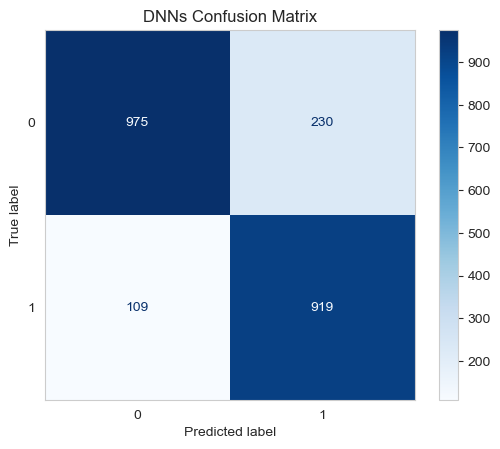

In [79]:
# Print confusion matrix
print("\nConfusion Matrix on Testing Data:")
cnf_dnn = confusion_matrix(y_test, y_test_pred)
class_labels = sorted(set(y_test))  # Or [0, 1] for binary classification
disp_dnn = ConfusionMatrixDisplay(confusion_matrix=cnf_dnn, display_labels=class_labels)
disp_dnn.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title('DNNs Confusion Matrix')
plt.savefig('DNNS Confusion Matrix.png', bbox_inches='tight', pad_inches=0.1)
plt.grid(False)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


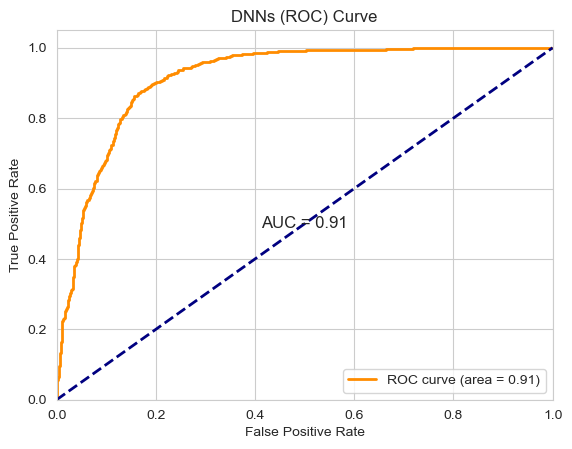

In [80]:
y_pred_proba = dnn.predict(X_test)[:, 0]
# Convert string labels to integers
y_true_int = y_test.astype(int)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_int, y_pred_proba)
auc = roc_auc_score(y_true_int, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNNs (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.5, 0.5, 'AUC = %0.2f' % auc, ha='center', va='center', fontsize=12)
plt.savefig('DNNs (ROC)Curve.png')
plt.show()

### Models Performance

                 Model  Score
0        Random Forest  85.58
2        Decision Tree  85.58
1              XGBoost  85.45
5                  DNN  84.82
4                  MLP  82.62
3  Logistic Regression  82.27


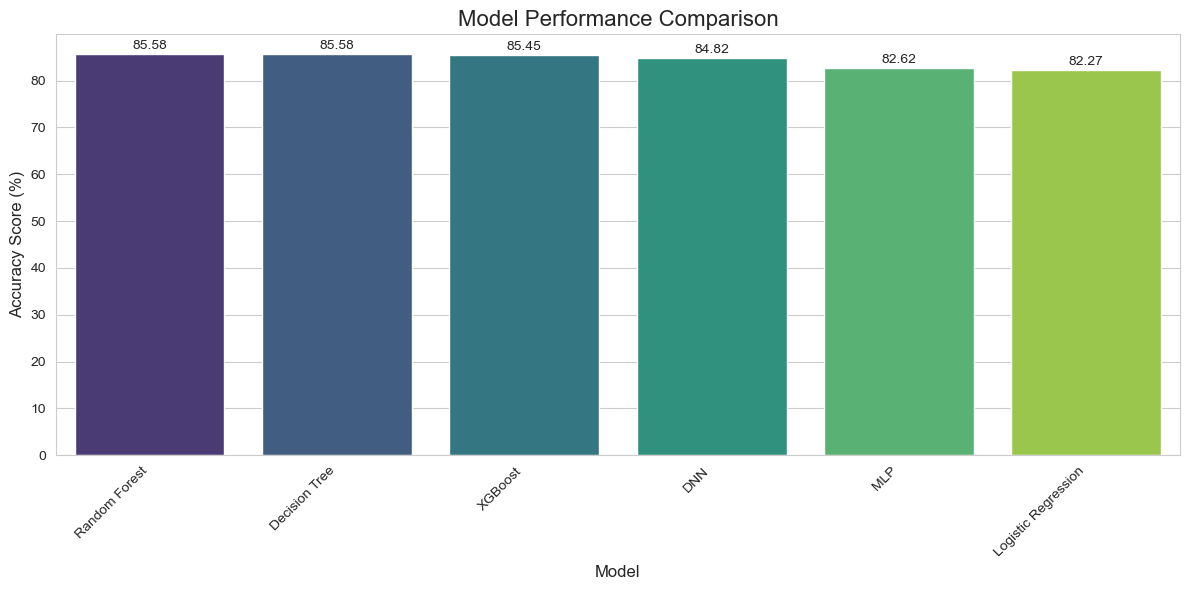

In [81]:
# Creating a DataFrame to compare the performance of different models
models = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'Decision Tree', 'Logistic Regression', 'MLP', 'DNN'],
    'Score': [round(accuracy_score(y_test, ytestpred_rfc)*100, 2),
              round(accuracy_score(y_test, y_test_pred_xgb)*100, 2),
              round(accuracy_score(y_test, ytestpred_dtree)*100, 2),
              round(accuracy_score(y_test, ytestpred_LR)*100, 2),
              round(accuracy_score(y_test, ytestpred_mlp)*100, 2),
              round(accuracy_score(y_test, y_test_pred)*100, 2)]  # Use the converted predictions here
})

# Sorting the DataFrame by the 'Score' column in descending order
models_sorted = models.sort_values(by='Score', ascending=False)
print(models_sorted)

from mpl_toolkits.mplot3d import Axes3D

# Assuming models_sorted is your DataFrame with 'Model' and 'Score' columns

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

# Create the bar plot
ax = sns.barplot(x='Model', y='Score', data=models_sorted, palette='viridis')

# Customize the plot
plt.title('Model Performance Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy Score (%)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(models_sorted['Score']):
    ax.text(i, v + 0.5, f'{v:.2f}', ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.savefig('2d_model_performance_plot.png', dpi=300, bbox_inches='tight')
plt.show()